## Phase 2 Project

* Authors: Jules Mejia
* Instructor name: Hardik
* Date : Sunday 2 July 2023
***

## Overview

This project is an opportunity to apply the concepts and techniques I have learned in Phase 2 and apply it using real world data. Through exploratory data analysis and linear regression, this report will generate 3 key insights that will aid in the decision making of a residential builder looking to make a presence in King County. It is important to understand the relationship each variable has with price so the residential builder can have a blueprint for their designs.

## Business Problem

A residential builder based in the USA has had much success on the east coast. They are looking to expand their market into the west coast of the USA, starting in King County, Washington. The residential builder would like to understand what factors influence the price of a house in that area.

The aim is to generate designs of a house based on those 5 factors and offer it as an option in King County. 

The model generated will be based on inference rather than prediction. I want to identify which features have a strong relationship with house price and see their effect. 

## Exploratory Data Analysis

The dataset to be used for this model comes houses that were sold between 2014 and 2015 in King County, Washington. There are 21,597 entries containing a wide variety of information including features of the house (number bedrooms, bathrooms), location (zipcode, latitude, longitude) and ratings (view, grade).

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

df = pd.read_csv('data/kc_house_data.csv')
df.head()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [2]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [3]:
# Check data types, identify columns for cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# 2 object columns, Date and sqft_basement
# Date column does not affect target variable price. Does not require cleaning
# Investigate sqft_basement column

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [5]:
# '?' is present. Check how many instances this occurs

df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [6]:
# '?' has 454 instances. Could be a placeholder or does not have a basement
# 0.0 has 12,826 instances out of 21,597 . This means 59% of houses do not have a basement
# Therefore I will treat '?' as 0.0

df['sqft_basement'] = df['sqft_basement'].replace("\?", 0, regex=True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [7]:
# Re-check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
# Identify NaN values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# Investigate view column

df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [10]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [11]:
# View looks to be categorical data (rating system)
# Majority of houses do not have a view rating plus small amount of NaN values
# Therefore I will treat NaN values as 0.

df['view'].fillna(0, inplace=True)

In [12]:
# Investigate waterfront column

df['waterfront'].unique()

array([nan,  0.,  1.])

In [13]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
# Waterfront looks to be categorical data (yes or no)
# Majority of houses do not have a waterfront. Makes sense in terms of real world application
# Therefore I will treat NaN values as 0.

df['waterfront'].fillna(0, inplace=True)

In [15]:
# Investigate yr_renovated column

df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [16]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [17]:
# Again yr_renovated looks to be categorical data (years)
# Majority have not been renovated. Makes sense in terms of real world application
# Therefore I will treat NaN values as 0.

df['yr_renovated'].fillna(0, inplace=True)

In [18]:
# Check NaN values

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
# Drop columns id and date because they definitely do not affect price
# Use a heatmap to visualise correlation between variables

df = df.drop(columns=['id', 'date'])

In [20]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

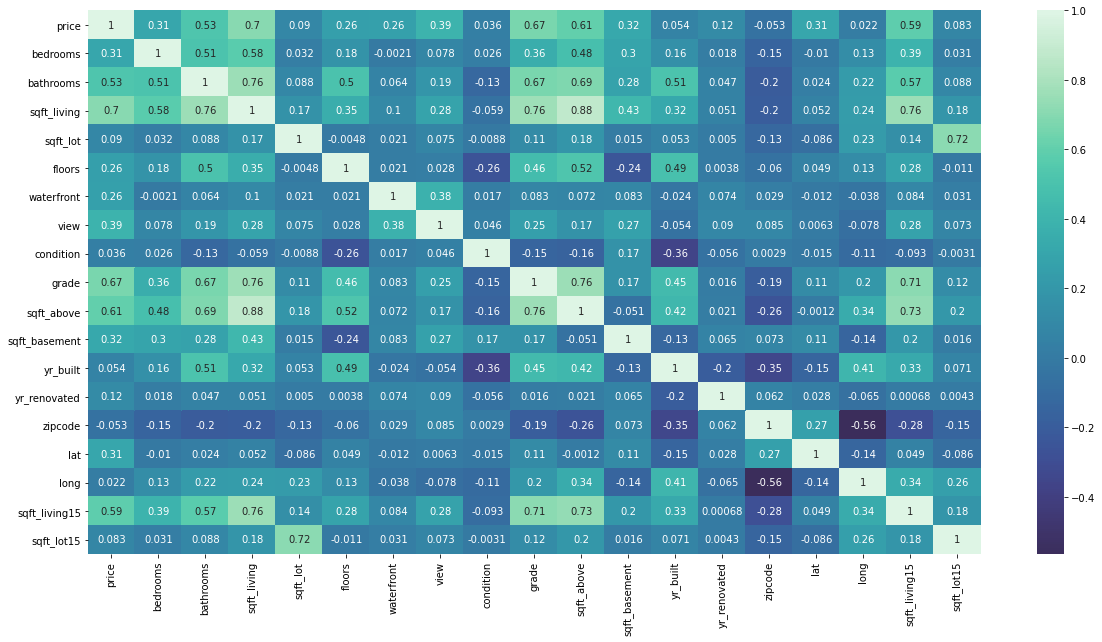

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, center=0, cmap='mako');

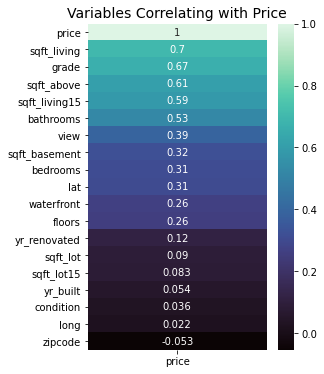

In [22]:
# Now ordered in a way to see ranking of correlations
# This will help in decision making of what variables to consider during transformations

price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Price', fontsize=14);
plt.savefig("Images/df_price_corr.png", bbox_inches='tight');

## Iteration 1 (Baseline Model)

Now that I am happy with my EDA, I will generate a baseline model. This model will contain all data and no transformations. It will be compared to subsequent iterations to observe the effect of the transformations.

In [23]:
continuous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']

# Log transform and normalize
df_cont = df[continuous]

for col in categoricals:
    df_cont[col] = df[col].astype('category')

# Perform one-hot encoding
df_cat = pd.get_dummies(df_cont[categoricals], prefix=categoricals, drop_first=True)

df_baseline = pd.concat([df_cont, df_cat], axis=1)

X = df_baseline.drop('price', axis=1)
y = df_baseline['price']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<ipython-input-23-2b2b64093d2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont[col] = df[col].astype('category')
<ipython-input-23-2b2b64093d2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont[col] = df[col].astype('category')
<ipython-input-23-2b2b64093d2f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     363.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        06:58:25   Log-Likelihood:            -2.8711e+05
No. Observations:               21597   AIC:                         5.749e+05
Df Residuals:                   21272   BIC:                         5.775e+05
Df Model:                         324                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.02e+04    863.405    -11.813      0.000   -1.19e+04   -8507.161
sqft_living            90.3915     13.168      6.864      0.000      64.580     116.203
sqft_lot                0.2620      0.035      7.506      0.000       0.194       0.330
sqft_above             63.5704     13.222      4.808      0.000      37.654      89.487
sqft_basement          18.9412     13.027      1.454      0.146      -6.592      44.475
lat                  2.193e+05   5.77e+04      3.803      0.000    1.06e+05    3.32e+05
long                -2.023e+05   4.15e+04     -4.876      0.000   -2.84e+05   -1.21e+05
sqft_living15          23.1900      2.702      8.582      0.000      17.893      28.487
sqft_lot15             -0.1594      0.055     -2.894      0.004      -0.267      -0.051
bedrooms            -3775.6995   3605.515     -1.047      0.295   -1.08e+04    3291.382
bathrooms            9.841e+04   1.57e+04      6.283      0.000    6.77e+04    1.29e+05
floors              -4199.3609   9722.997     -0.432      0.666   -2.33e+04    1.49e+04
waterfront            3.04e+05   7589.429     40.051      0.000    2.89e+05    3.19e+05
view                 5.849e+04   1714.336     34.118      0.000    5.51e+04    6.18e+04
condition            4.365e+04   8848.303      4.933      0.000    2.63e+04     6.1e+04
grade                4.497e+04    2.1e+04      2.138      0.033    3737.452    8.62e+04
yr_built             -327.8934    210.384     -1.559      0.119    -740.263      84.476
yr_renovated            7.7422      4.948      1.565      0.118      -1.956      17.440
zipcode              -354.1892     57.278     -6.184      0.000    -466.458    -241.920
bedrooms_2            1.11e+04   1.12e+04      0.989      0.323   -1.09e+04    3.31e+04
bedrooms_3           2.664e+04   1.22e+04      2.177      0.029    2653.715    5.06e+04
bedrooms_4           1.522e+04   1.43e+04      1.067      0.286   -1.27e+04    4.32e+04
bedrooms_5           4799.9175   1.71e+04      0.281      0.779   -2.87e+04    3.83e+04
bedrooms_6          -1.846e+04   2.14e+04     -0.861      0.389   -6.05e+04    2.36e+04
bedrooms_7          -1.433e+05   3.27e+04     -4.378      0.000   -2.07e+05   -7.92e+04
bedrooms_8          -6167.8425   4.73e+04     -0.130      0.896   -9.88e+04    8.65e+04
bedrooms_9          -1.597e+05   6.98e+04     -2.287      0.022   -2.97e+05   -2.29e+04
bedrooms_10         -2.902e+05   8.65e+04     -3.355      0.001    -4.6e+05   -1.21e+05
bedrooms_11         -9.224e+04   1.44e+05     -0.640      0.522   -3.75e+05     1.9e+05
bedrooms_33          1.776e+05   5.83e+04      3.045      0.002    6.33e+04    2.92e+05
bathrooms_0.75      -1.376e+04   7.14e+04     -0.193      0.847   -1.54e+05    1.26e+05
bathrooms_1.0       -4132.1079   6.54e+04     -0.063      0.950   -1.32e+05    1.24e+05
bat

### Iteration 1 Model Comments

So far the P-values indicate all independent variables except sqft_basement are statistically significant. That would make sense given that all the features we have chosen would have an effect on the price of the house. The adjusted R-squared is a great value however there are many categorical variables that are not statistically significant leading to high variance.

Skew = 2.235 indicates the model is positively skewed

Kurtosis = 43.117 indicates this is a leptokurtic curve. Data likely has heavy tails and many outliers

However, the aim is to narrow down which independent variables has the strongest effect on the target variable. The builder will then be able to focus their design and budget on those parameters.

I will explore each variable and evaluate against the linearity assumptions

### Distributions and KDE

Visualise the distribution of each variable. If they are not normally distributed, determine the next step to evaluate the variable.

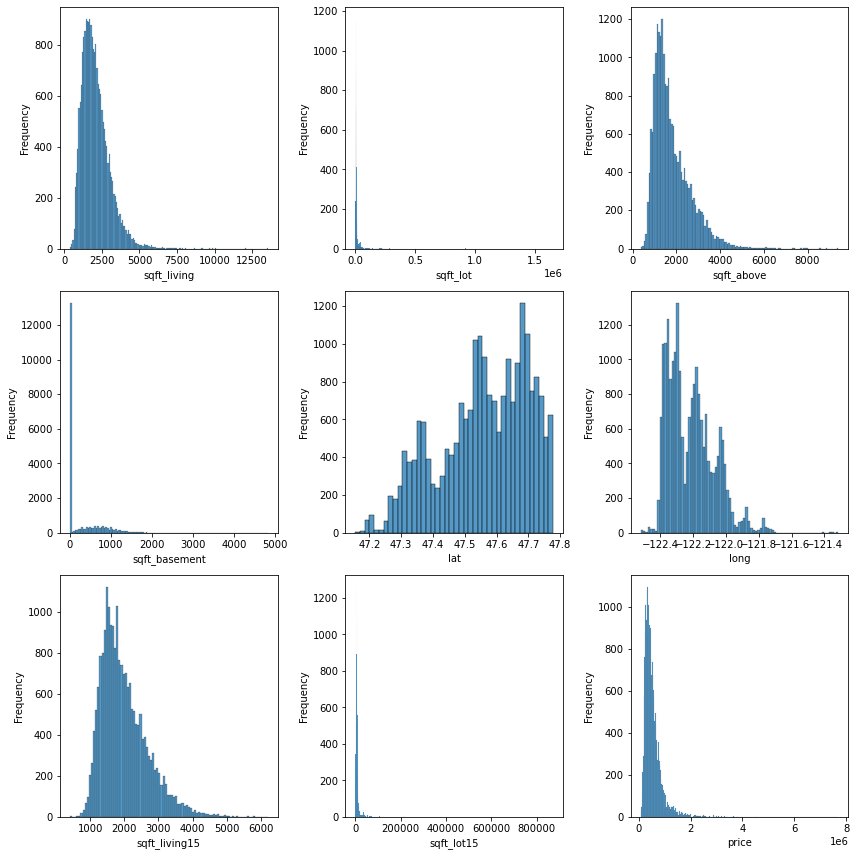

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    sns.histplot(data=df, x=column, ax=axs[row, col])
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig("images/dist_it1", bbox_inches='tight')

plt.show()

### Distribution and KDE comments

Normal distribution with positive skew
* price
* sqft_living
* sqft_lot
* sqft_above
* sqft_basement
* long 
* sqft_living15 

Normal distribution with negative skew
* lat

Not a great distribution. Maybe outliers greatly affecting it
* sqft_lot15

Many of the histograms also exhibit quite large tails. This is an indication of outliers.

### Verify the Linearity Assumption

Identify which variables have a linear relationship with the target variable price

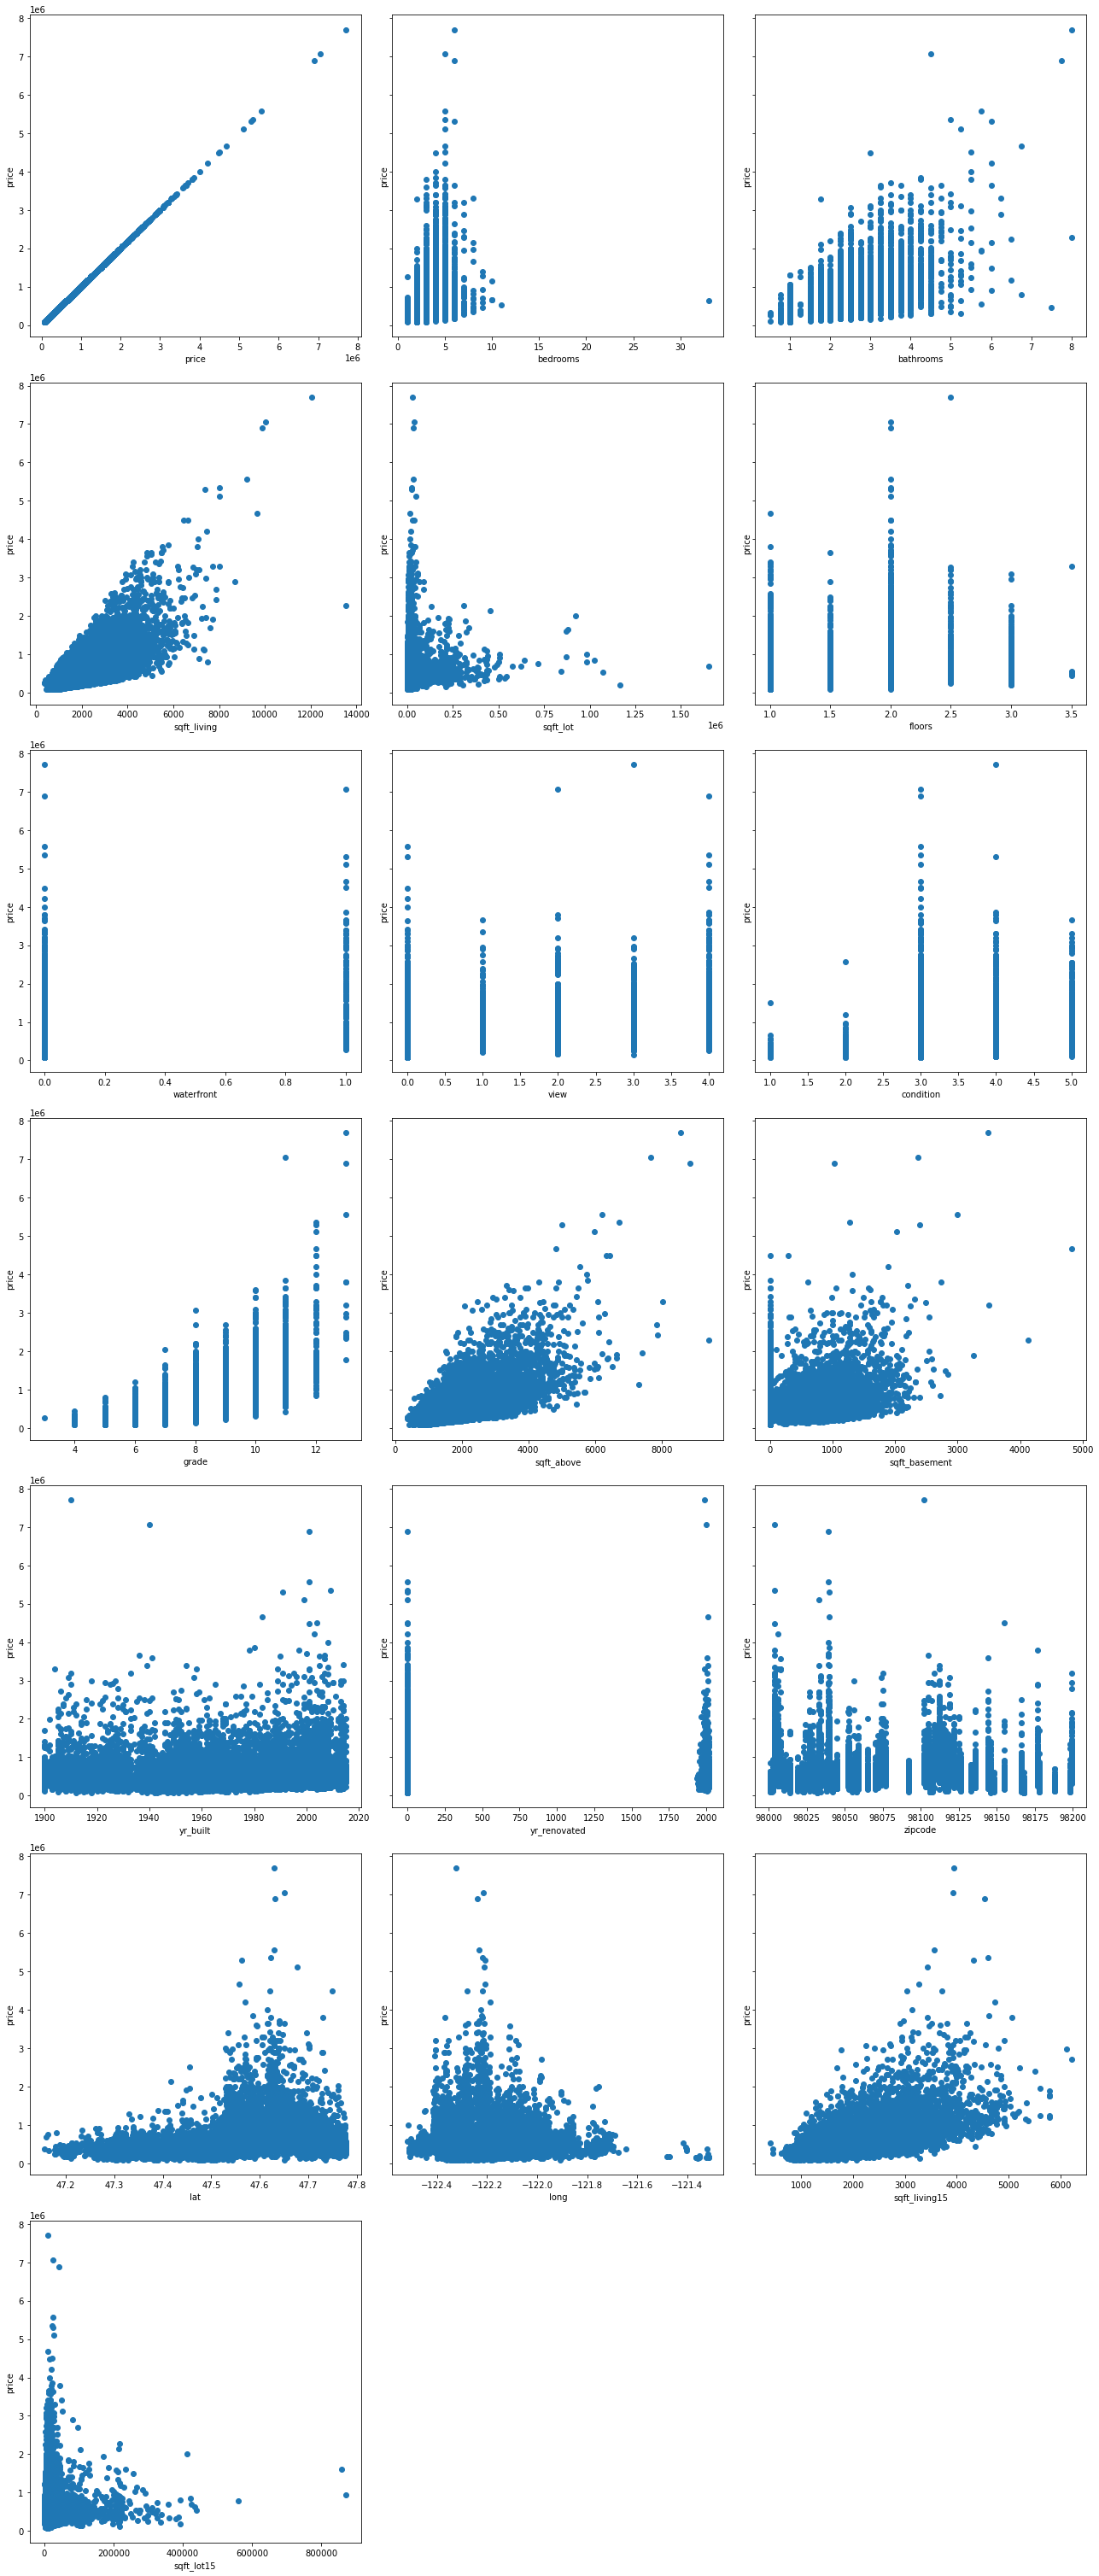

In [25]:
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed to display the subplots

fig, axs = plt.subplots(num_rows, 3, sharey=True, figsize=(18, 6 * num_rows))

for idx, column in enumerate(df.columns):
    row_idx = idx // 3  # Calculate the row index for the subplot
    col_idx = idx % 3  # Calculate the column index for the subplot

    axs[row_idx, col_idx].scatter(df[column], df['price'])
    axs[row_idx, col_idx].set_xlabel(column)
    axs[row_idx, col_idx].set_ylabel('price')

# Hide empty subplots
if num_columns % 3 != 0:
    for idx in range(num_columns, num_rows * 3):
        row_idx = idx // 3
        col_idx = idx % 3
        plt.delaxes(axs[row_idx, col_idx])

plt.tight_layout()  # Adjust the spacing between subplots

plt.savefig("images/scat_lin_it1", bbox_inches='tight')

plt.show()


### Linearity Comments

Confirmed as categorical data.
* bedroom
* bathroom
* floors
* waterfront
* view
* condition
* grade

They are clustered but the scatter plot indicate these variables are categorical data.
* yr_built
* yr_renovated
* zipcode

Variables that have a strong linear relationship with price. These variables match up well with the ranking in the correlation heat map.
* price
* sqft_living
* sqft_above
* sqft_living15

This variable has a strong linear relationship if there is a basement present.
Otherwise there are many without a basement.
* sqft_basement

Variables that have a weak linear relationship with price.
* sqft_lot
* lat
* long
* sqft_lot15

### Verify the Normality and Homoscedasticity Assumptions

R-Squared: 0.0953497028373066
Intercept    127199.512685
bedrooms     122464.444174
dtype: float64


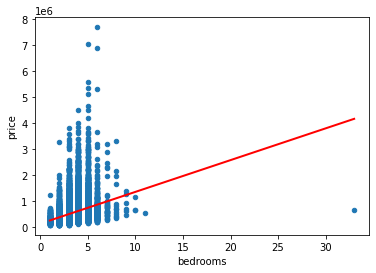

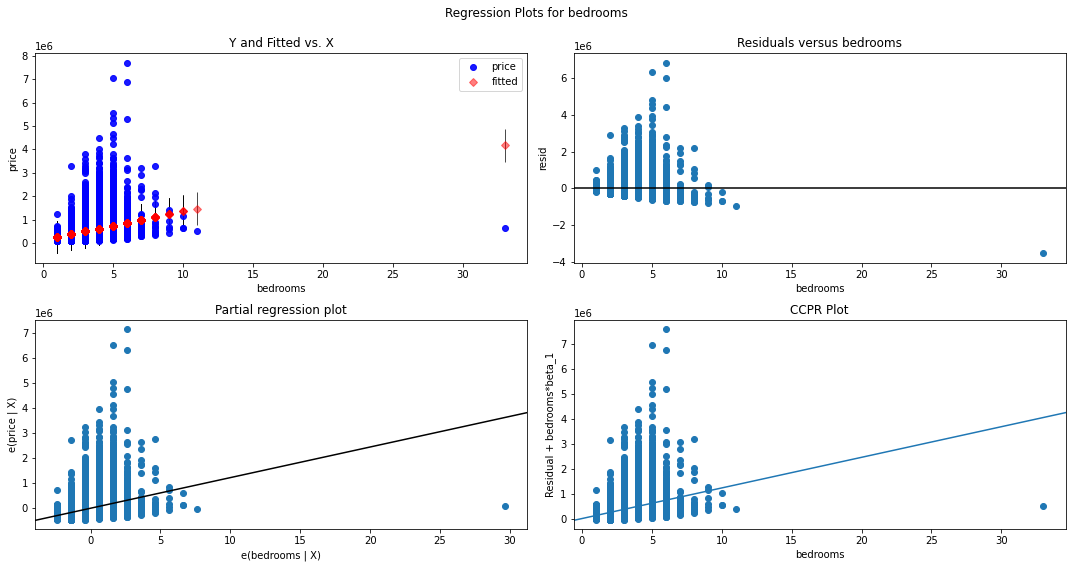

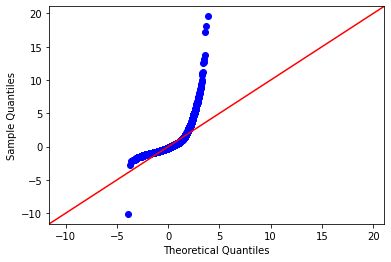

In [26]:
data=df
f = 'price~bedrooms'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'bedrooms': [data.bedrooms.min(), data.bedrooms.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='bedrooms', y='price', ax=ax)
ax.plot(X_new['bedrooms'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

### Normality and homoscedasticity and categorical variables

A straightforward concept but these results were produced to highlight the importance of transforming categorical variables.

These plots represent a prediction line, the error terms, heteroscedasticity and Q-Q plot. Using categorical variables, the data is not plotted in the way we expect for continuous. However we do know the independent variable has an effect on the price of a house based on the heat map and the P-value in the baseline model. Therefore, all categorical data will need to have dummy variables created in order to observe its relationship with price

R-Squared: 0.49268789904035093
Intercept     -43988.892194
sqft_living      280.863014
dtype: float64


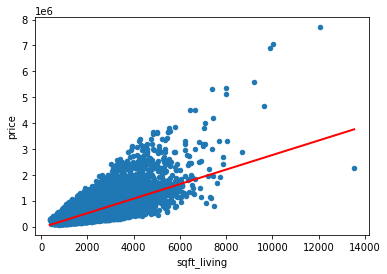

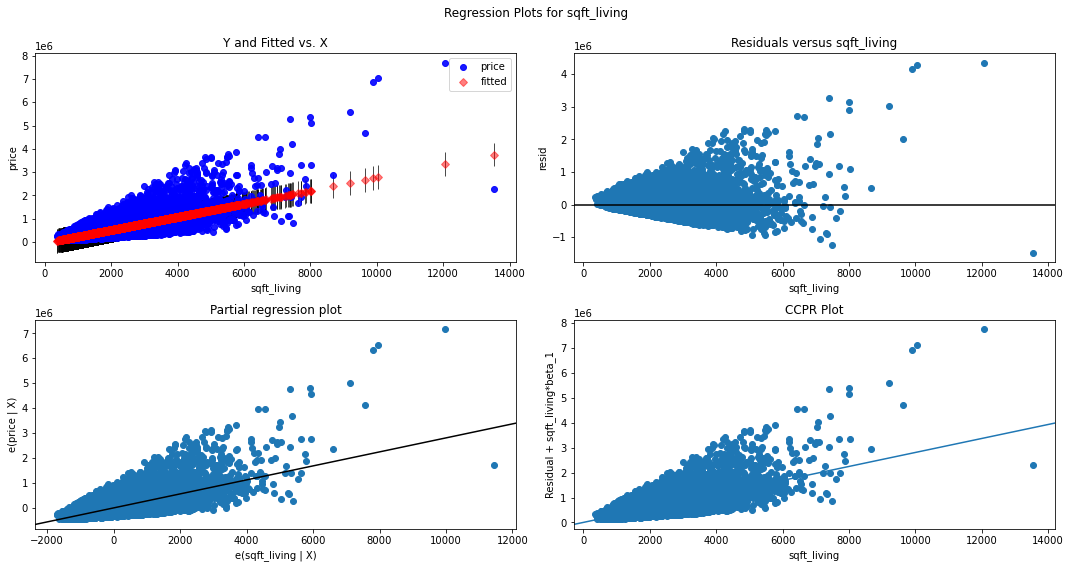

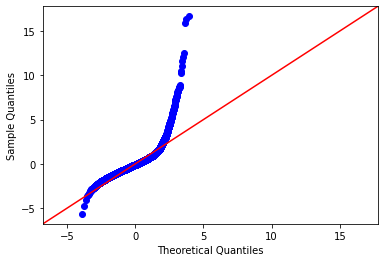

In [27]:
# Checking the normality and homoscedasticity assumptions on continuous variables

data=df
f = 'price~sqft_living'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living', y='price', ax=ax)
ax.plot(X_new['sqft_living'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_sqft_living_norm_homo_it1", bbox_inches='tight')

plt.show()

R-Squared: 0.36647034726583816
Intercept     59757.111006
sqft_above      268.668406
dtype: float64


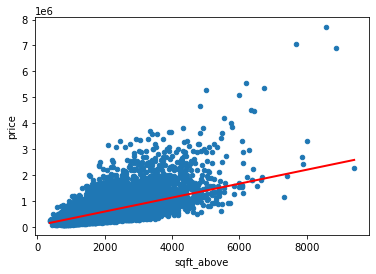

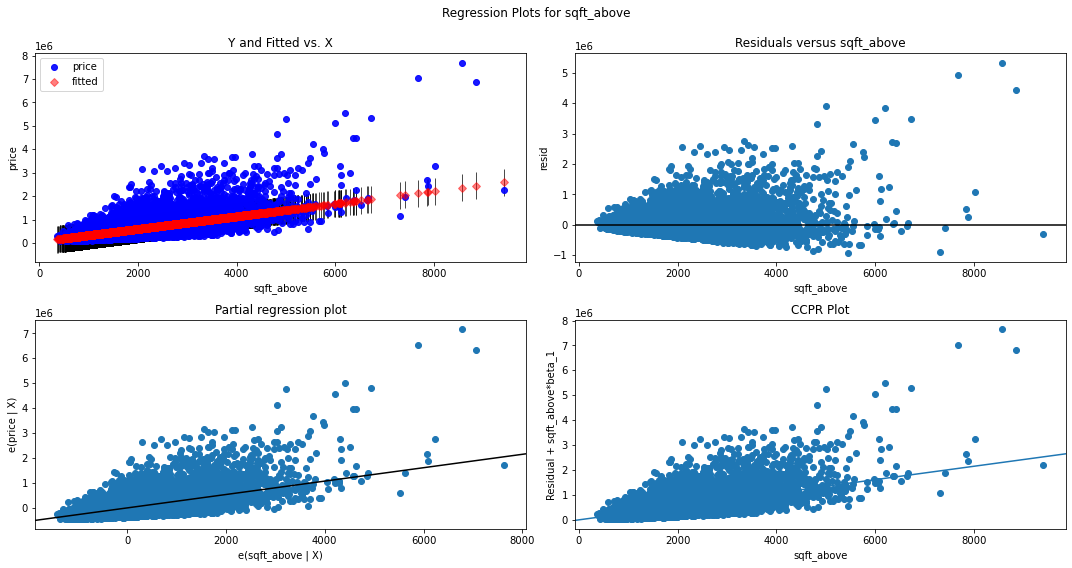

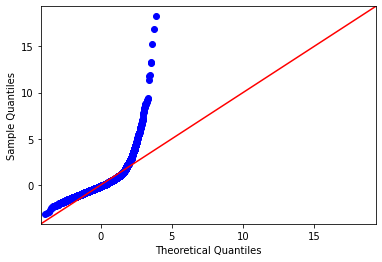

In [28]:
data=df
f = 'price~sqft_above'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_above': [data.sqft_above.min(), data.sqft_above.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_above', y='price', ax=ax)
ax.plot(X_new['sqft_above'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.3425072641720194
Intercept       -83028.487369
sqft_living15      313.761545
dtype: float64


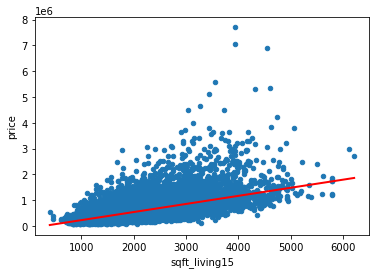

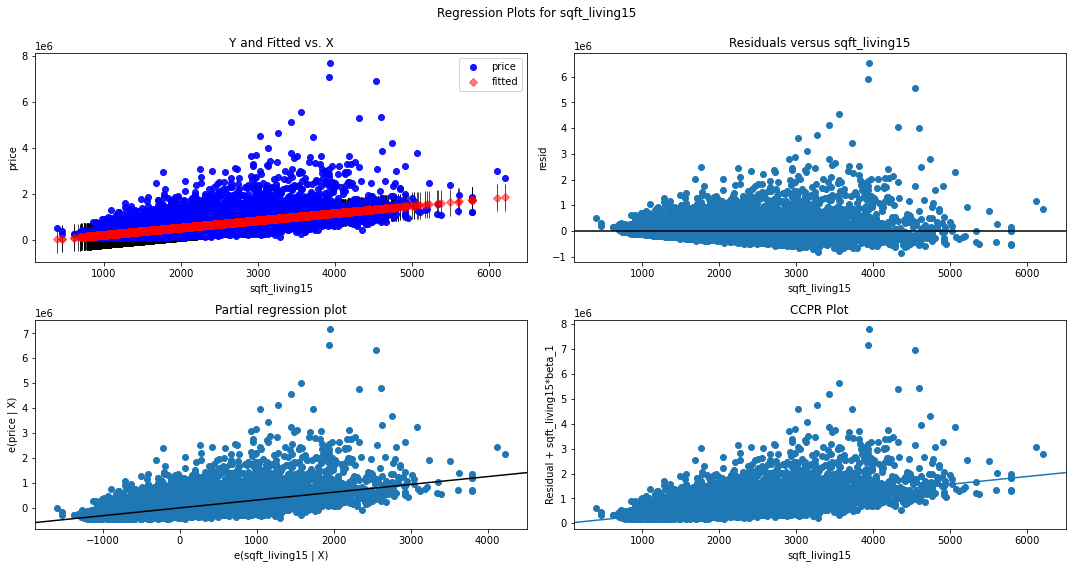

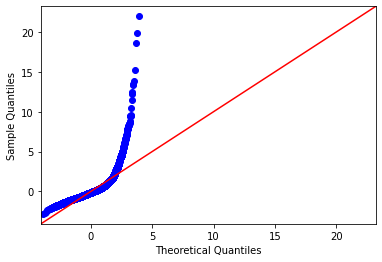

In [29]:
data=df
f = 'price~sqft_living15'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living15': [data.sqft_living15.min(), data.sqft_living15.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living15', y='price', ax=ax)
ax.plot(X_new['sqft_living15'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.10311007135689387
Intercept        463664.130330
sqft_basement       268.211396
dtype: float64


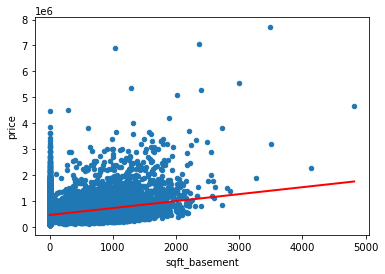

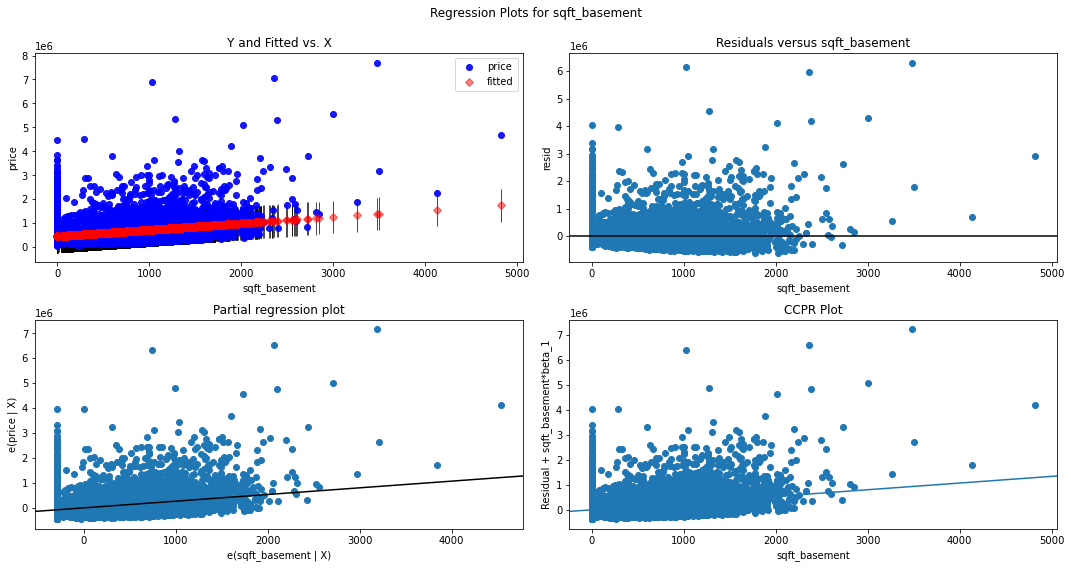

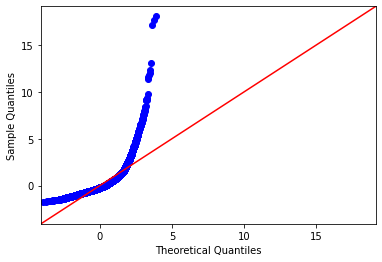

In [30]:
data=df
f = 'price~sqft_basement'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_basement': [data.sqft_basement.min(), data.sqft_basement.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_basement', y='price', ax=ax)
ax.plot(X_new['sqft_basement'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_sqft_basement_norm_homo_it1", bbox_inches='tight')

plt.show()

R-Squared: 0.008077735099594197
Intercept    528258.046513
sqft_lot          0.797285
dtype: float64


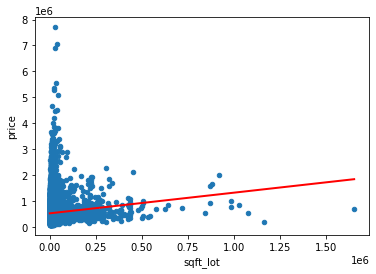

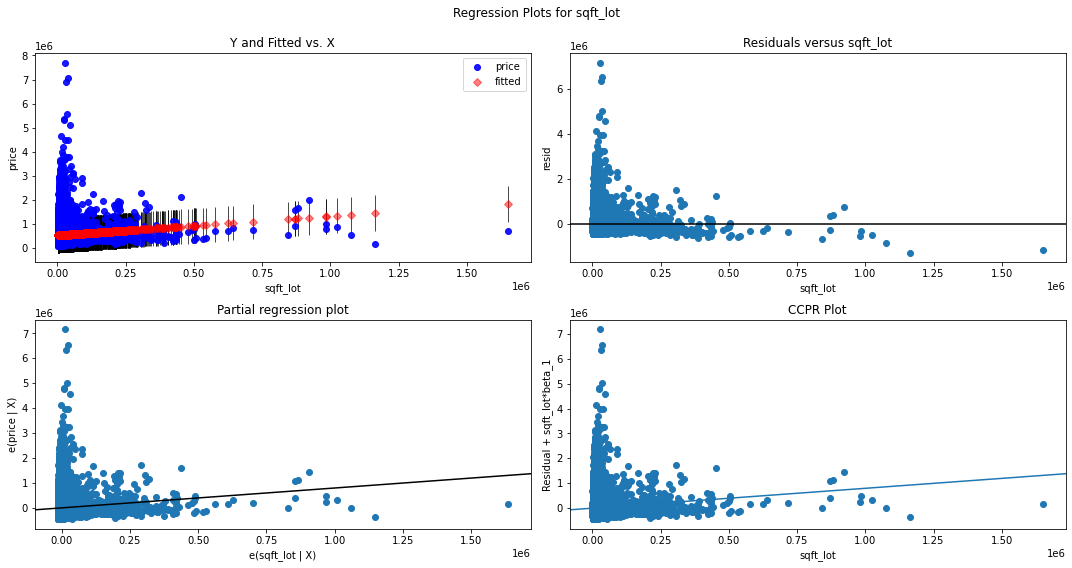

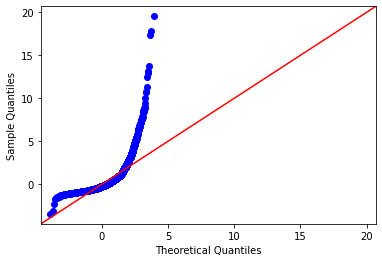

In [31]:
data=df
f = 'price~sqft_lot'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_lot': [data.sqft_lot.min(), data.sqft_lot.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_lot', y='price', ax=ax)
ax.plot(X_new['sqft_lot'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.09406017561857005
Intercept   -3.813512e+07
lat          8.131905e+05
dtype: float64


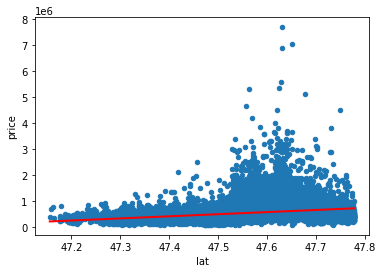

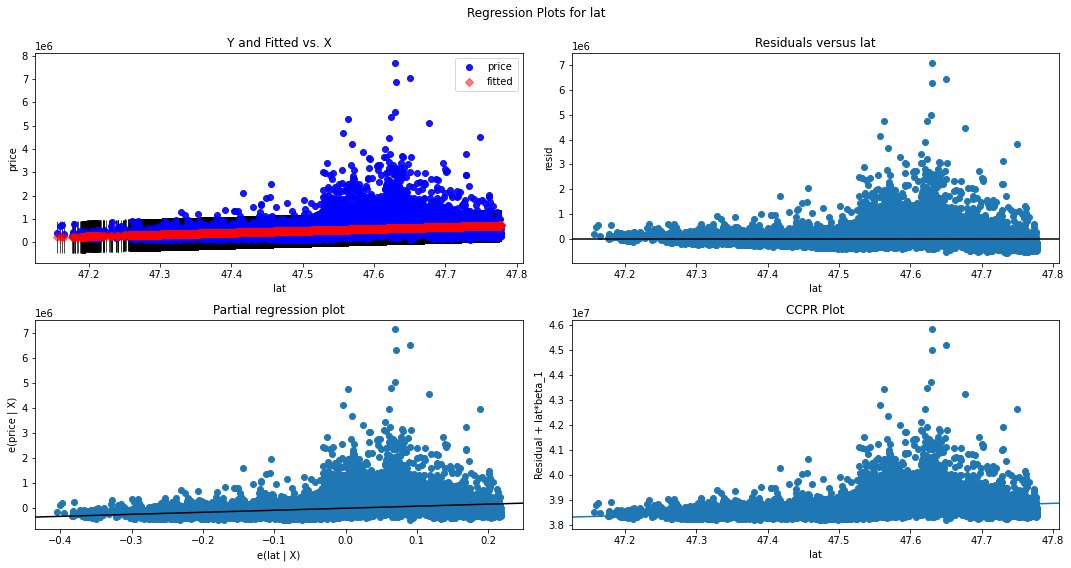

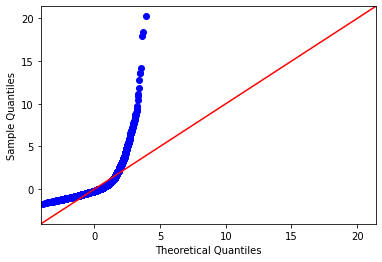

In [32]:
data=df
f = 'price~lat'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'lat': [data.lat.min(), data.lat.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='lat', y='price', ax=ax)
ax.plot(X_new['lat'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "lat", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

R-Squared: 0.00048559944782555764
Intercept    7.570935e+06
long         5.752728e+04
dtype: float64


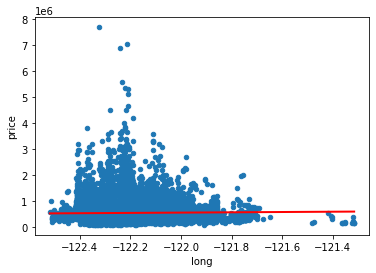

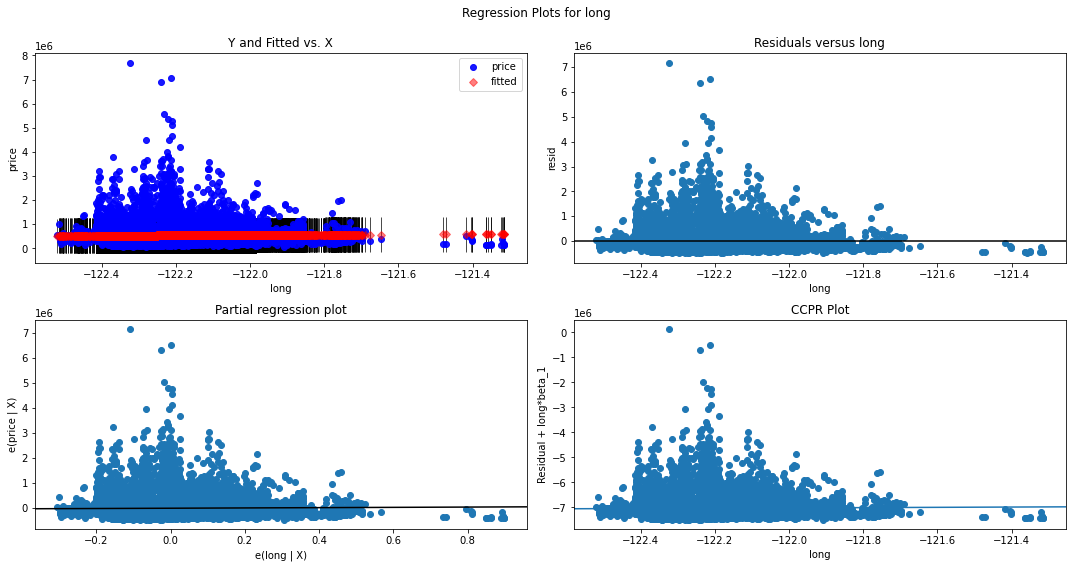

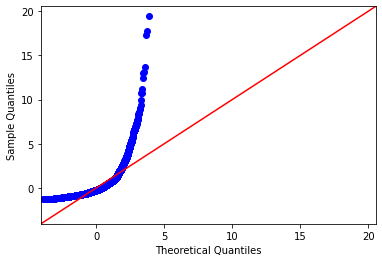

In [33]:
data=df
f = 'price~long'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'long': [data.long.min(), data.long.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='long', y='price', ax=ax)
ax.plot(X_new['long'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "long", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_sqft_long_norm_homo_it1", bbox_inches='tight')

plt.show()

R-Squared: 0.00686328262138447
Intercept     526060.054695
sqft_lot15         1.115865
dtype: float64


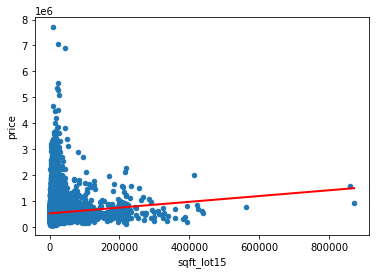

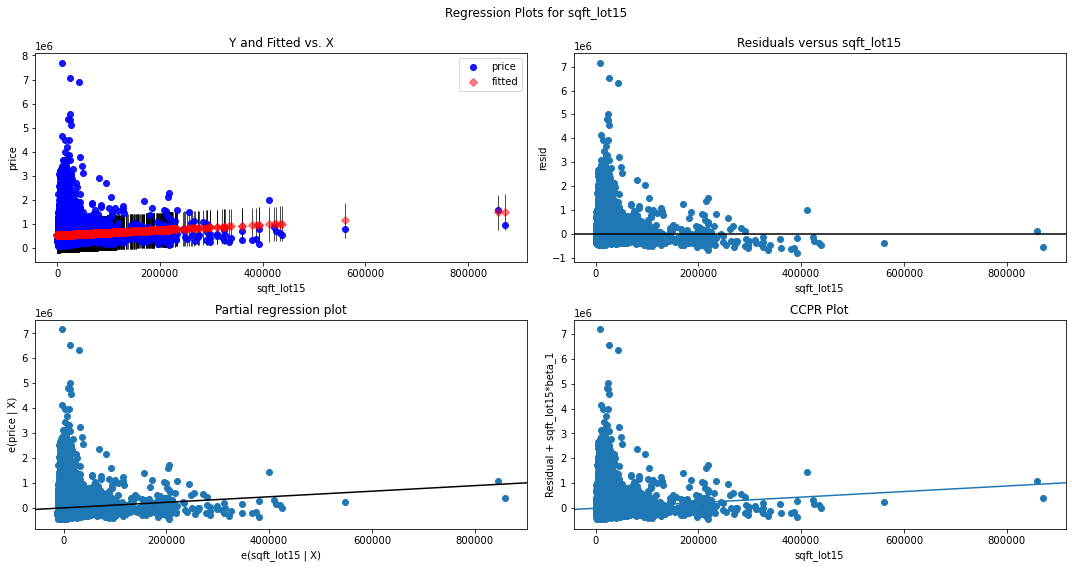

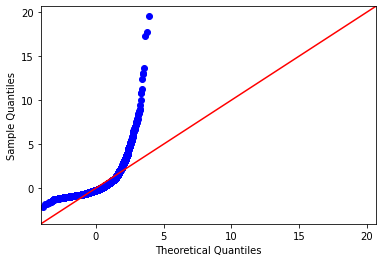

In [34]:
data=df
f = 'price~sqft_lot15'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_lot15': [data.sqft_lot15.min(), data.sqft_lot15.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_lot15', y='price', ax=ax)
ax.plot(X_new['sqft_lot15'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot15", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

### Homoscedasticity and Normality Assumption Comments

Below are the observations made when checking the linearity assumption with the R-squared value generated from the prediction line plot

Strong linear relationship
* price (target variable)
* sqft_living - 0.49
* sqft_above - 0.37
* sqft_living15 - 0.34

Possible strong linear relationship if there is a basement present
* sqft_basement - 0.10

Weak linear relationship
* sqft_lot - 0.008
* lat - 0.09
* long - 0.0004
* sqft_lot15 - 0.006

It is clear what was observed in the linearity assumption matches with the prediction line plot. It would be safe to say that the weak linear relationship variables can be disregarded except for sqft_basement. The low R-squared value might be affected by the high volume of houses without a basement. However if the house has behaviour, the plot behaves similarly to the strong linear relationship variables. It is worth investigating the sqft_basement with the data that includes only basement houses.

Therefore, below are the variables to be considered for verifying the homoscedasticity and normality assumption

* sqft_living
* sqft_above
* sqft_living15

All variables violate the homoscedasticity assumption. For the normality assumption, all variables can be rejected based on the Q-Q plot. However I have seen previously that these variables are normally distributed. Therefore transformations are required to help normalise the distribution and pass the homoscedasticity and normality assumption

In [35]:
# Exploring sqft_basement without houses that do not have a basement

df_sqft_basement = df.iloc[:, [0,11]]
df_sqft_basement.head()

price  sqft_basement
0  221900.0            0.0
1  538000.0          400.0
2  180000.0            0.0
3  604000.0          910.0
4  510000.0            0.0

In [36]:
df_sqft_basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   sqft_basement  21597 non-null  float64
dtypes: float64(2)
memory usage: 337.6 KB


In [37]:
df_sqft_basement = df_sqft_basement[df_sqft_basement['sqft_basement'] != 0.0]
df_sqft_basement.head()

price  sqft_basement
1    538000.0          400.0
3    604000.0          910.0
5   1230000.0         1530.0
8    229500.0          730.0
10   662500.0         1700.0

In [38]:
df_sqft_basement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 1 to 21591
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          8317 non-null   float64
 1   sqft_basement  8317 non-null   float64
dtypes: float64(2)
memory usage: 194.9 KB


R-Squared: 0.16675402649464288
Intercept        290950.690144
sqft_basement       447.611997
dtype: float64


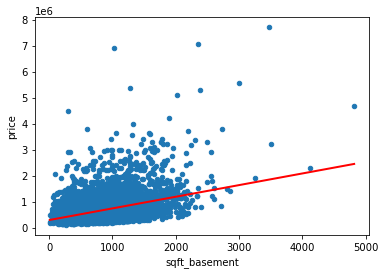

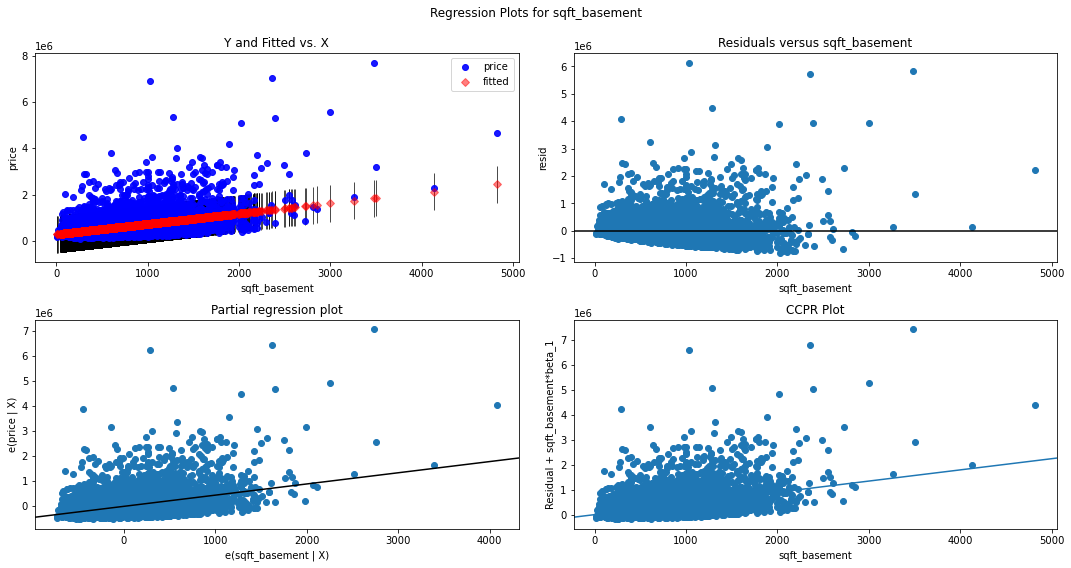

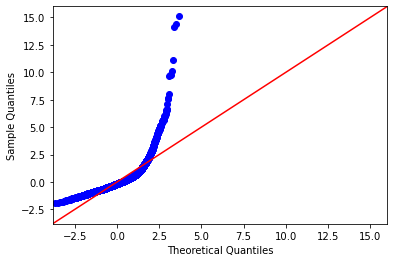

In [39]:
data=df_sqft_basement
f = 'price~sqft_basement'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_basement': [data.sqft_basement.min(), data.sqft_basement.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_basement', y='price', ax=ax)
ax.plot(X_new['sqft_basement'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_sqft_basement_norm_homo_it1_no_zero", bbox_inches='tight')

plt.show()

Removing the houses that did not have a basement increased the R-squared from 0.10 to 0.16. However this indicates a weak relationship with the price and will also be disregarded.

## Iteration 2

Below are the observations made in iteration 1 and how I will address them in iteration 2

### From the Linearity Comments in Iteration 1

These independent variables are categorical variables with their correlation score from the heat map.
* grade - 0.67
* bathrooms - 0.53
* view - 0.39
* bedrooms - 0.31
* floors - 0.26
* waterfront - 0.26
* yr_renovated - 0.12
* yr_built - 0.054
* condition - 0.036
* zipcode - -0.053

Based on the correlation score, I will not use the bottom 4 independent variables in this model. They do not have a strong enough correlation with the target variable. Dummy variables will be created so the remaining categorical variables can be used in the regression model.

### From Linearity, Homoscedasticity and Normality Comments in Iteration 1

It has been shown through verifying the assumptions that these variables do not have a strong enough linear relationship. I will consider dropping these variables especially during the multicollinearity checking phase.

* sqft_lot
* lat
* long
* sqft_lot15
* sqft_basement

The variables below have shown to have a strong relationship with the target variable however violate the linear assumptions. I will use log transformations to improve performance.

* sqft_living
* sqft_above
* sqft_living15

Before the transformations are applied, I will address the outliers observed in the normal distributions and scatter plots.

### Removing Outliers

In [40]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      3.409825      7.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676     68.758207  98077.951845   
std      827.759761     439.819830     29.375234    364.037499     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

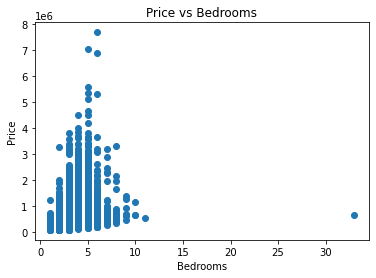

In [41]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

In [42]:
# Scatter plot for bedrooms indicates an outlier to the far right

df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [43]:
df[df['bedrooms'] == 33]

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
15856  640000.0        33       1.75         1620      6000     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856         0.0   0.0          5      7        1040          580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947           0.0    98103  47.6878 -122.331           1330   

       sqft_lot15  
15856        4700

In [44]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error

df['bedrooms'] = df['bedrooms'].replace(33, 3)

In [45]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

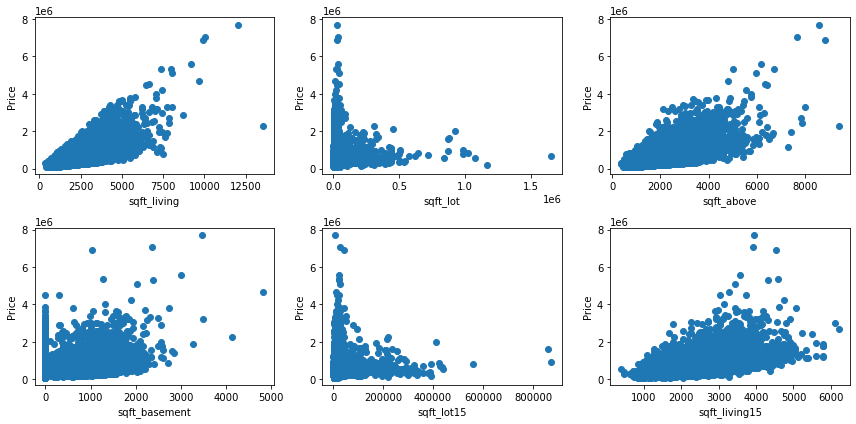

In [46]:
# Several sqft variables have outliers to the right. Could be related

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].scatter(df['sqft_living'], df['price'])
axs[0, 0].set_xlabel('sqft_living')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(df['sqft_lot'], df['price'])
axs[0, 1].set_xlabel('sqft_lot')
axs[0, 1].set_ylabel('Price')

axs[0, 2].scatter(df['sqft_above'], df['price'])
axs[0, 2].set_xlabel('sqft_above')
axs[0, 2].set_ylabel('Price')

axs[1, 0].scatter(df['sqft_basement'], df['price'])
axs[1, 0].set_xlabel('sqft_basement')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(df['sqft_lot15'], df['price'])
axs[1, 1].set_xlabel('sqft_lot15')
axs[1, 1].set_ylabel('Price')

axs[1, 2].scatter(df['sqft_living15'], df['price'])
axs[1, 2].set_xlabel('sqft_living15')
axs[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()

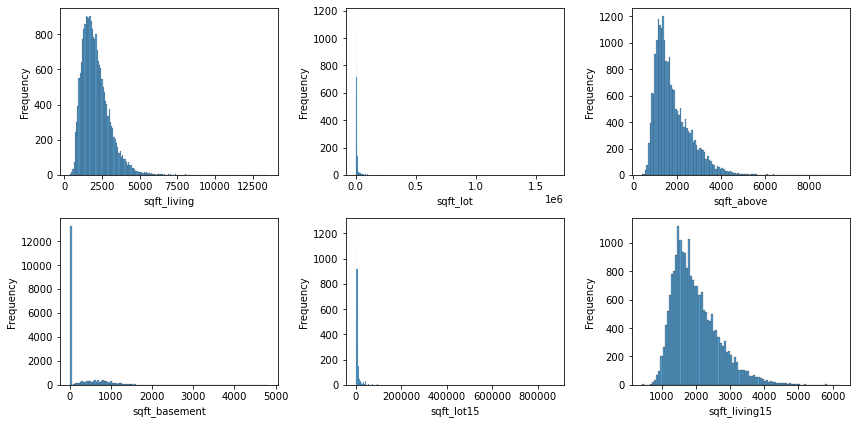

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

sns.histplot(data=df, x='sqft_living', ax=axs[0, 0])
axs[0, 0].set_xlabel('sqft_living')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(data=df, x='sqft_lot', ax=axs[0, 1])
axs[0, 1].set_xlabel('sqft_lot')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(data=df, x='sqft_above', ax=axs[0, 2])
axs[0, 2].set_xlabel('sqft_above')
axs[0, 2].set_ylabel('Frequency')

sns.histplot(data=df, x='sqft_basement', ax=axs[1, 0])
axs[1, 0].set_xlabel('sqft_basement')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(data=df, x='sqft_lot15', ax=axs[1, 1])
axs[1, 1].set_xlabel('sqft_lot15')
axs[1, 1].set_ylabel('Frequency')

sns.histplot(data=df, x='sqft_living15', ax=axs[1, 2])
axs[1, 2].set_xlabel('sqft_living15')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig("images/cont_var_hist_it2", bbox_inches='tight')

plt.show()

In [48]:
# Reduce outliers by reducing data size to 3 standard deviations

filter_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

df1 = df[~df[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20538 non-null  float64
 1   bedrooms       20538 non-null  int64  
 2   bathrooms      20538 non-null  float64
 3   sqft_living    20538 non-null  int64  
 4   sqft_lot       20538 non-null  int64  
 5   floors         20538 non-null  float64
 6   waterfront     20538 non-null  float64
 7   view           20538 non-null  float64
 8   condition      20538 non-null  int64  
 9   grade          20538 non-null  int64  
 10  sqft_above     20538 non-null  int64  
 11  sqft_basement  20538 non-null  float64
 12  yr_built       20538 non-null  int64  
 13  yr_renovated   20538 non-null  float64
 14  zipcode        20538 non-null  int64  
 15  lat            20538 non-null  float64
 16  long           20538 non-null  float64
 17  sqft_living15  20538 non-null  int64  
 18  sqft_l

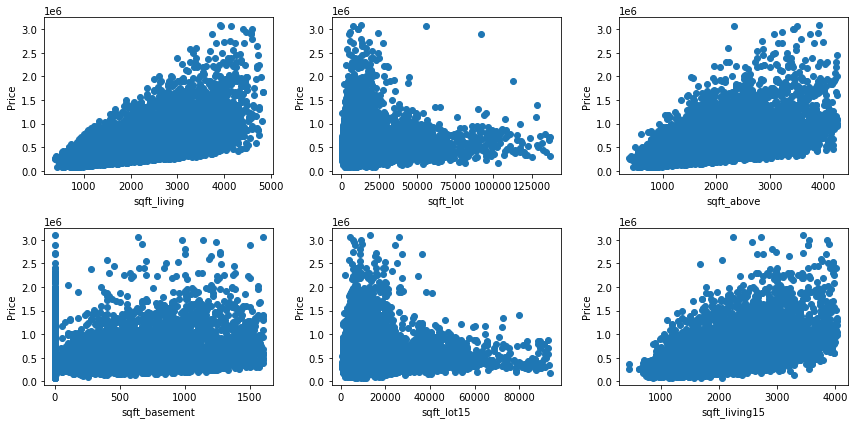

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].scatter(df1['sqft_living'], df1['price'])
axs[0, 0].set_xlabel('sqft_living')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(df1['sqft_lot'], df1['price'])
axs[0, 1].set_xlabel('sqft_lot')
axs[0, 1].set_ylabel('Price')

axs[0, 2].scatter(df1['sqft_above'], df1['price'])
axs[0, 2].set_xlabel('sqft_above')
axs[0, 2].set_ylabel('Price')

axs[1, 0].scatter(df1['sqft_basement'], df1['price'])
axs[1, 0].set_xlabel('sqft_basement')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(df1['sqft_lot15'], df1['price'])
axs[1, 1].set_xlabel('sqft_lot15')
axs[1, 1].set_ylabel('Price')

axs[1, 2].scatter(df1['sqft_living15'], df1['price'])
axs[1, 2].set_xlabel('sqft_living15')
axs[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()

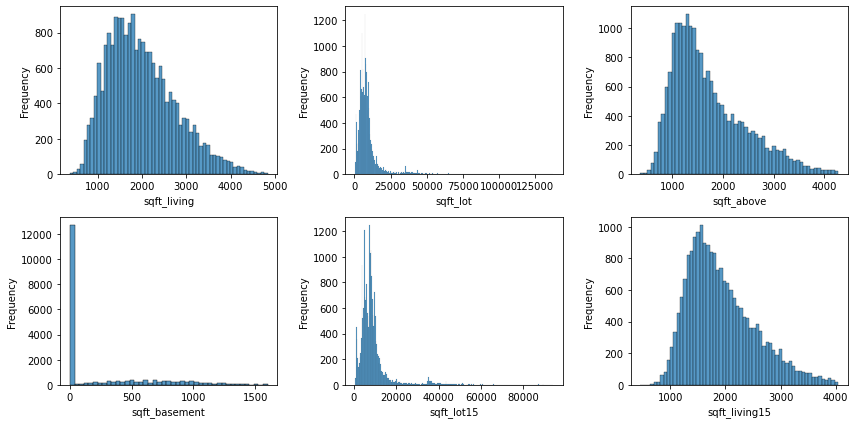

In [52]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

sns.histplot(data=df1, x='sqft_living', ax=axs[0, 0])
axs[0, 0].set_xlabel('sqft_living')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(data=df1, x='sqft_lot', ax=axs[0, 1])
axs[0, 1].set_xlabel('sqft_lot')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(data=df1, x='sqft_above', ax=axs[0, 2])
axs[0, 2].set_xlabel('sqft_above')
axs[0, 2].set_ylabel('Frequency')

sns.histplot(data=df1, x='sqft_basement', ax=axs[1, 0])
axs[1, 0].set_xlabel('sqft_basement')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(data=df1, x='sqft_lot15', ax=axs[1, 1])
axs[1, 1].set_xlabel('sqft_lot15')
axs[1, 1].set_ylabel('Frequency')

sns.histplot(data=df1, x='sqft_living15', ax=axs[1, 2])
axs[1, 2].set_xlabel('sqft_living15')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()

plt.savefig("images/cont_var_hist_std3_it2", bbox_inches='tight')

plt.show()

Scatter plots and histograms are now much improved

### Multicollinearity

To improve the performance of the model and have accurate co-efficients, highly correlated variables must be removed. 

In [53]:
df1.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
numeric_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

df1_preprocessed = df1.loc[:, numeric_vars]
df1_preprocessed.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0         0.0   
1  538000.0         3       2.25         2570      7242     2.0         0.0   
2  180000.0         2       1.00          770     10000     1.0         0.0   
3  604000.0         4       3.00         1960      5000     1.0         0.0   
4  510000.0         3       2.00         1680      8080     1.0         0.0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0   0.0          3      7        1180            0.0      1955           0.0   
1   0.0          3      7        2170          400.0      1951        1991.0   
2   0.0          3      6         770            0.0      1933           0.0   
3   0.0          5      7        1050          910.0      1965           0.0   
4   0.0          3      8        1680            0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

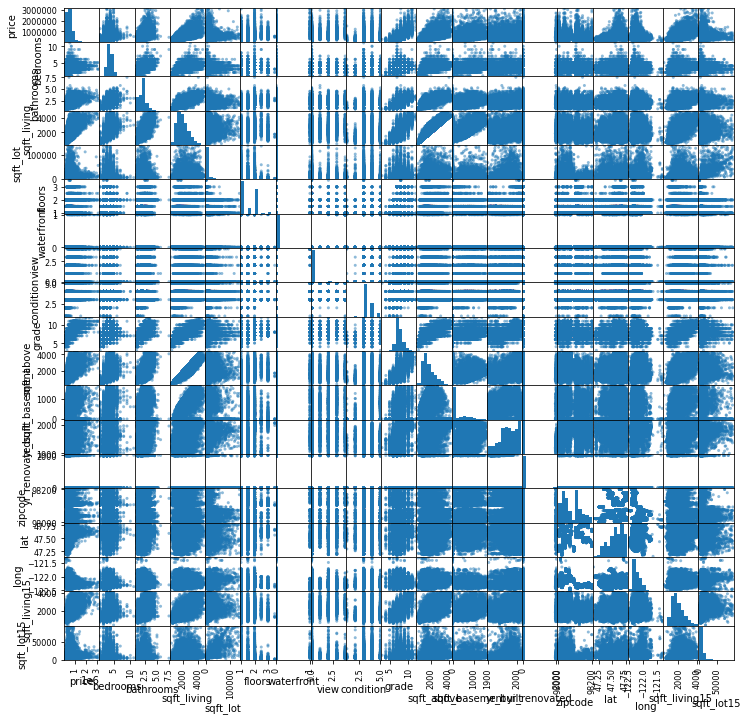

In [55]:
pd.plotting.scatter_matrix(df1_preprocessed, figsize=[12, 12]);

At a quick glance, the sqft variables seem to be highly correlated. In terms of real world application, you would expect the sqft_living to be related to sqft_basement. A new home builder would consider that the basement size be dictated by the living area or vice versa.

In [56]:
df1_preprocessed.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.285593   0.460046     0.635162  0.095391  0.265336   
bedrooms       0.285593  1.000000   0.505753     0.602363  0.091132  0.173091   
bathrooms      0.460046  0.505753   1.000000     0.724945  0.059202  0.513247   
sqft_living    0.635162  0.602363   0.724945     1.000000  0.217353  0.364046   
sqft_lot       0.095391  0.091132   0.059202     0.217353  1.000000 -0.097669   
floors         0.265336  0.173091   0.513247     0.364046 -0.097669  1.000000   
waterfront     0.199667 -0.019747   0.028278     0.053219  0.064416  0.012401   
view           0.357803  0.045879   0.130847     0.213072  0.064616  0.016792   
condition      0.056164  0.024101  -0.128019    -0.057986  0.035406 -0.266185   
grade          0.639554  0.332976   0.623731     0.722997  0.133028  0.465129   
sqft_above     0.534189  0.486447   0.645544     0.858325  0.209234  0.540628   
sqft_basement  0.254437  0.273337   0.224374     0.367534  0.040809 -0.272359   
yr_built       0.019186  0.154726   0.519911     0.324893  0.027574  0.493352   
yr_renovated   0.120737  0.016290   0.044375     0.049171  0.016818  0.005713   
zipcode       -0.015058 -0.153461  -0.195327    -0.190628 -0.182542 -0.056824   
lat            0.369515 -0.022727   0.013752     0.046984 -0.065493  0.044926   
long          -0.002184  0.138094   0.218157     0.237012  0.272930  0.121787   
sqft_living15  0.556598  0.384900   0.530424     0.740538  0.257205  0.274094   
sqft_lot15     0.087982  0.090121   0.062388     0.216218  0.811946 -0.101125   

               waterfront      view  condition     grade  sqft_above  \
price            0.199667  0.357803   0.056164  0.639554    0.534189   
bedrooms        -0.019747  0.045879   0.024101  0.332976    0.486447   
bathrooms        0.028278  0.130847  -0.128019  0.623731    0.645544   
sqft_living      0.053219  0.213072  -0.057986  0.722997    0.858325   
sqft_lot         0.064416  0.064616   0.035406  0.133028    0.209234   
floors           0.012401  0.016792  -0.266185  0.465129    0.540628   
waterfront       1.000000  0.373713   0.016999  0.050276    0.031949   
view             0.373713  1.000000   0.044520  0.196453    0.104858   
condition        0.016999  0.044520   1.000000 -0.150321   -0.164004   
grade            0.050276  0.196453  -0.150321  1.000000    0.716787   
sqft_above       0.031949  0.104858  -0.164004  0.716787    1.000000   
sqft_basement    0.044235  0.216992   0.179367  0.094346   -0.152620   
yr_built        -0.030192 -0.077045  -0.358911  0.452754    0.436324   
yr_renovated     0.071672  0.093474  -0.055615  0.012962    0.020586   
zipcode          0.036453  0.112629  -0.005482 -0.170620   -0.262292   
lat             -0.019626  0.013409  -0.012228  0.114709   -0.013273   
long            -0.039130 -0.105760  -0.095605  0.185712    0.348911   
sqft_living15    0.061009  0.234459  -0.092425  0.678932    0.715323   
sqft_lot15       0.088295  0.062853   0.047864  0.145900    0.213856   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.254437  0.019186      0.120737 -0.015058  0.369515   
bedrooms            0.273337  0.154726      0.016290 -0.153461 -0.022727   
bathrooms           0.224374  0.519911      0.044375 -0.195327  0.013752   
sqft_living         0.367534  0.324893      0.049171 -0.190628  0.046984   
sqft_lot            0.040809  0.027574      0.016818 -0.182542 -0.065493   
floors             -0.272359  0.493352      0.005713 -0.056824  0.044926   
waterfront          0.044235 -0.030192      0.071672  0.036453 -0.019626   
view                0.216992 -0.077045      0.093474  0.112629  0.013409   
condition           0.179367 -0.358911     -0.055615 -0.005482 -0.012228   
grade               0.094346  0.452754      0.012962 -0.170620  0.114709   
sqft_above         -0.152620  0.436324      0.020586 -0.262292 -0.013273   
sqft_basement       1.000000 -0.159945      

In [57]:
abs(df1_preprocessed.corr()) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True        False     False   False   
sqft_living    False     False      False         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
grade          False     False      False        False     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False        False     False   False   
sqft_lot15     False     False      False        False      True   False   

               waterfront   view  condition  grade  sqft_above  sqft_basement  \
price               False  False      False  False       False          False   
bedrooms            False  False      False  False       False          False   
bathrooms           False  False      False  False       False          False   
sqft_living         False  False      False  False        True          False   
sqft_lot            False  False      False  False       False          False   
floors              False  False      False  False       False          False   
waterfront           True  False      False  False       False          False   
view                False   True      False  False       False          False   
condition           False  False       True  False       False          False   
grade               False  False      False   True       False          False   
sqft_above          False  False      False  False        True          False   
sqft_basement       False  False      False  False       False           True   
yr_built            False  False      False  False       False          False   
yr_renovated        False  False      False  False       False          False   
zipcode             False  False      False  False       False          False   
lat                 False  False      False  False       False          False   
long                False  False      False  False       False          False   
sqft_living15       False  False      False  False       False          False   
sqft_lot15          False  False      False  False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False          False   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
grade             False         False    False  False  False          False   
sqft

In [58]:
df1_corr_pairs = df1_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df1_corr_pairs['pairs'] = list(zip(df1_corr_pairs.level_0, df1_corr_pairs.level_1))

df1_corr_pairs.set_index(['pairs'], inplace = True)

df1_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df1_corr_pairs.columns = ['cc']

df1_corr_pairs.drop_duplicates(inplace=True)

df1_corr_pairs[(df1_corr_pairs.cc>.75) & (df1_corr_pairs.cc<1)]

cc
pairs                              
(sqft_living, sqft_above)  0.858325
(sqft_lot15, sqft_lot)     0.811946

Recalling the continuous variables that were found not to have a strong linear relationship with price

* sqft_lot
* lat
* long
* sqft_lot15
* sqft_basement

And the continuous variables with a strong linear relationship

* sqft_living
* sqft_above
* sqft_living15

In order to prevent multicollinearity, I will remove variables sqft_lot15 and sqft_above. Although sqft_above has a strong linear relationship with price, I value sqft_living and sqft_living15 as a better variable for affecting price. Generally speaking, the larger the area for living, the higher the price of a house. With surrounding houses having a larger area for living, generally the house price for the area is also high.

I will also drop the variables that do not have a strong linear relationship with price.

### Log Transformations

By performing and multicollinearity and using the observations in iteration 1, the continuous variables to be log transformed is finalised

In [59]:
continuous = ['sqft_living', 'sqft_living15','price']

# Log transform and normalize
df1_cont = df1[continuous]

# log features
log_names = [f'{column}_log' for column in df1_cont.columns]

df1_log = np.log(df1_cont)
df1_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df1_log_norm = df1_log.apply(normalize)

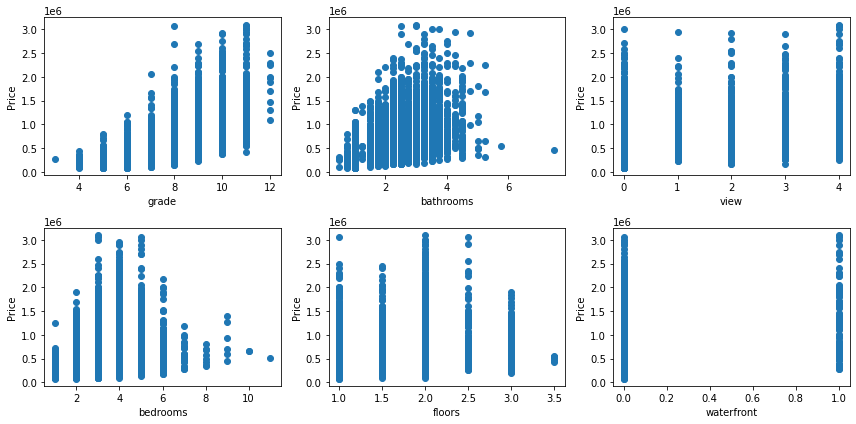

In [60]:
# Verifying categorical variables

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

axs[0, 0].scatter(df1['grade'], df1['price'])
axs[0, 0].set_xlabel('grade')
axs[0, 0].set_ylabel('Price')

axs[0, 1].scatter(df1['bathrooms'], df1['price'])
axs[0, 1].set_xlabel('bathrooms')
axs[0, 1].set_ylabel('Price')

axs[0, 2].scatter(df1['view'], df1['price'])
axs[0, 2].set_xlabel('view')
axs[0, 2].set_ylabel('Price')

axs[1, 0].scatter(df1['bedrooms'], df1['price'])
axs[1, 0].set_xlabel('bedrooms')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(df1['floors'], df1['price'])
axs[1, 1].set_xlabel('floors')
axs[1, 1].set_ylabel('Price')

axs[1, 2].scatter(df1['waterfront'], df1['price'])
axs[1, 2].set_xlabel('waterfront')
axs[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()

In [61]:
categoricals = ['grade', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']

# Convert columns to category data type
for col in categoricals:
    df1[col] = df1[col].astype('category')

# Perform one-hot encoding
df1_cat = pd.get_dummies(df1[categoricals], prefix=categoricals, drop_first=True)

<ipython-input-61-f7725d793556>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('category')
<ipython-input-61-f7725d793556>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype('category')
<ipython-input-61-f7725d793556>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [62]:
df2 = pd.concat([df1_log_norm, df1_cat], axis=1)
df2.head()

sqft_living_log  sqft_living15_log  price_log  grade_4  grade_5  grade_6  \
0        -1.121522          -1.019966  -1.424053        0        0        0   
1         0.835051          -0.273574   0.368409        0        0        0   
2        -2.194530           1.257118  -1.847602        0        0        1   
3         0.153960          -0.972315   0.602610        0        0        0   
4        -0.233515          -0.070754   0.260234        0        0        0   

   grade_7  grade_8  grade_9  grade_10  ...  bedrooms_8  bedrooms_9  \
0        1        0        0         0  ...           0           0   
1        1        0        0         0  ...           0           0   
2        0        0        0         0  ...           0           0   
3        1        0        0         0  ...           0           0   
4        0        1        0         0  ...           0           0   

   bedrooms_10  bedrooms_11  floors_1.5  floors_2.0  floors_2.5  floors_3.0  \
0            0            0           0           0           0           0   
1            0            0           0           1           0           0   
2            0            0           0           0           0           0   
3            0            0           0           0           0           0   
4            0            0           0           0           0           0   

   floors_3.5  waterfront_1.0  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  

[5 rows x 53 columns]

In [63]:
X = df2.drop('price_log', axis=1)
y = df2['price_log']

In [64]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     497.5
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:00:01   Log-Likelihood:                -20756.
No. Observations:               20538   AIC:                         4.162e+04
Df Residuals:                   20485   BIC:                         4.204e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5864      0.750     -0.782      0.434      -2.055       0.883
sqft_living_log       0.3186      0.010     31.303      0.000       0.299       0.339
sqft_living15_log     0.1235      0.007     16.629      0.000       0.109       0.138
grade_4              -0.8597      0.680     -1.265      0.206      -2.192       0.472
grade_5              -0.6793      0.673     -1.010      0.313      -1.998       0.639
grade_6              -0.3152      0.672     -0.469      0.639      -1.633       1.002
grade_7               0.0643      0.672      0.096      0.924      -1.253       1.382
grade_8               0.4245      0.672      0.631      0.528      -0.894       1.742
grade_9               0.8410      0.673      1.250      0.211      -0.477       2.159
grade_10              1.1392      0.673      1.693      0.091      -0.180       2.458
grade_11              1.3925      0.675      2.064      0.039       0.070       2.715
grade_12              1.7482      0.705      2.478      0.013       0.365       3.131
bathrooms_0.75        0.6380      0.344      1.857      0.063      -0.035       1.311
bathrooms_1.0         0.6067      0.333      1.820      0.069      -0.047       1.260
bathrooms_1.25        0.5845      0.400      1.460      0.144      -0.200       1.369
bathrooms_1.5         0.5354      0.334      1.604      0.109      -0.119       1.190
bathrooms_1.75        0.6029      0.334      1.807      0.071      -0.051       1.257
bathrooms_2.0         0.6122      0.334      1.835      0.067      -0.042       1.266
bathrooms_2.25        0.5535      0.334      1.658      0.097      -0.101       1.208
bathrooms_2.5         0.4270      0.334      1.280      0.201      -0.227       1.081
bathrooms_2.75        0.5845      0.334      1.749      0.080      -0.071       1.239
bathrooms_3.0         0.6358      0.335      1.900      0.057      -0.020       1.292
bathrooms_3.25        0.7655      0.335      2.284      0.022       0.109       1.422
bathrooms_3.5         0.7079      0.335      2.113      0.035       0.051       1.364
bathrooms_3.75        0.9664      0.340      2.846      0.004       0.301       1.632
bathrooms_4.0         0.8357      0.343      2.434      0.015       0.163       1.509
bathrooms_4.25        1.0294      0.353      2.919      0.004       0.338       1.721
bathrooms_4.5         0.7179      0.347      2.071      0.038       0.038       1.397
bathrooms_4.75        1.5234      0.472      3.226      0.001       0.598       2.449
bathrooms_5.0         0.7598      0.410      1.852      0.064      -0.044       1.564
bathrooms_5.25        1.1696      0.472      2.476      0.013       0.244       2.096
bathrooms_5.75       -0.1022      0.758     -0.135      0.893      -1.588       1.384
bathrooms_7.5        -0.1739      0.804     -0.216      0.829      -1.749

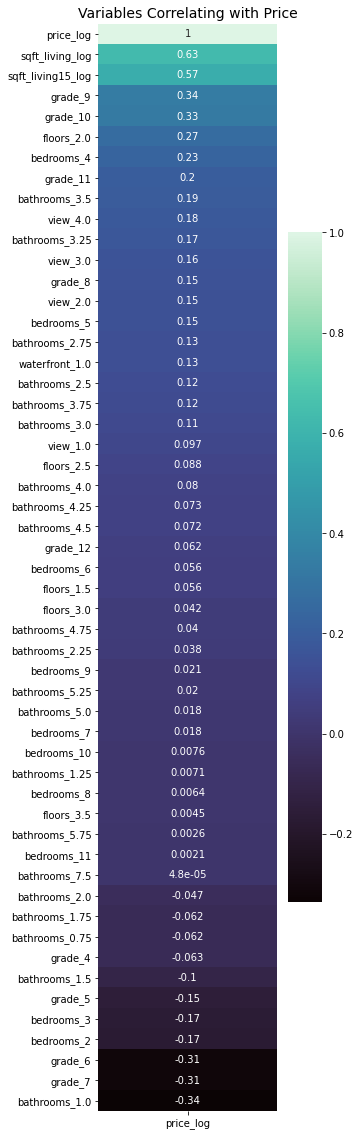

In [65]:
# Check which variables strongly correlate with price

price_corr = df2.corr()[['price_log']].sort_values(by='price_log', ascending=False)

plt.figure(figsize=(4, 20))
heatmap = sns.heatmap(price_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Price', fontsize=14);
plt.savefig("images/df2_price_corr", bbox_inches='tight')

### Iteration 2 Model Comments

Unexpectedly, the adjusted R-squared values decreased. By only choosing the continuous and categorical variables that have a strong relationship in the model, I expected an increase in the adjusted R-squared value. However the cause of the decrease might be explained by removing sqft_above. It showed high correlation with price but also high correlation with sqft_living. By removing sqft_above because of multicollinearity, the iteration 2 model is a more reliable representation of the data.

Reviewing the P-value, there are some variables that are not statistically significant. I will remove those variables to further refine in iteration 3. Reviewing the co-efficients, there are some independent variables that large values and match up with the correlation heat map like grade 9, 10 and 11. However grade 12 and 13 with big co-efficients fall lower on the correlation heat map.

### Distributions and KDE

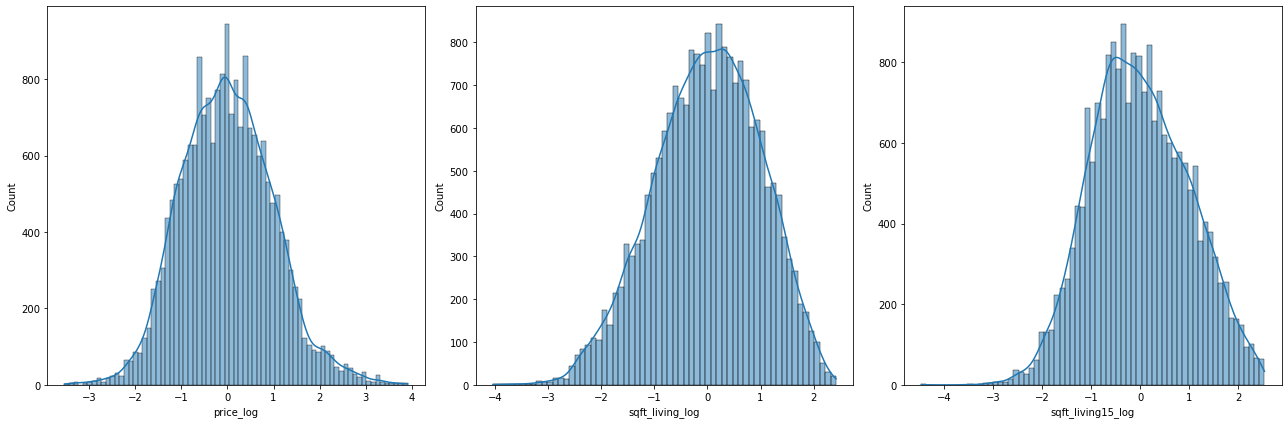

In [66]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=df2['price_log'], kde=True, ax=axs[0])
axs[0].set_xlabel('price_log')

sns.histplot(data=df2['sqft_living_log'], kde=True, ax=axs[1])
axs[1].set_xlabel('sqft_living_log')

sns.histplot(data=df2['sqft_living15_log'], kde=True, ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')

plt.tight_layout()

plt.savefig("images/dist_it2", bbox_inches='tight')

plt.show()

### Verify the Linearity assumption

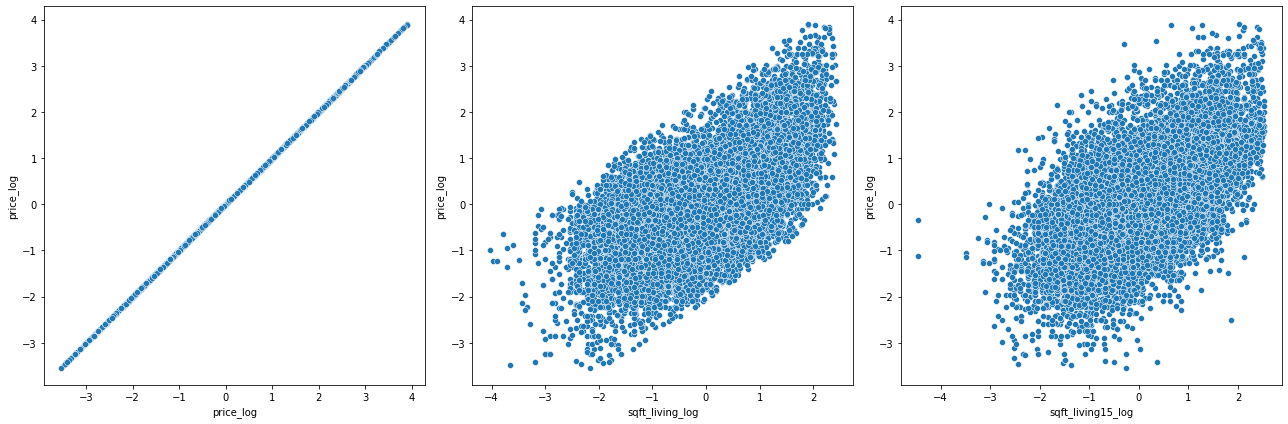

In [67]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df2, x='price_log', y='price_log', ax=axs[0])
axs[0].set_xlabel('price_log')
axs[0].set_ylabel('price_log')

sns.scatterplot(data=df2, x='sqft_living_log', y='price_log', ax=axs[1])
axs[1].set_xlabel('sqft_living_log')
axs[1].set_ylabel('price_log')

sns.scatterplot(data=df2, x='sqft_living15_log', y='price_log', ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')
axs[2].set_ylabel('price_log')

plt.tight_layout()

plt.savefig("images/scat_lin_it2", bbox_inches='tight')

plt.show()

### Verify the Normality and Homoscedasticity assumptions

R-Squared: 0.3962976141886999
Intercept          2.945560e-15
sqft_living_log    6.295217e-01
dtype: float64


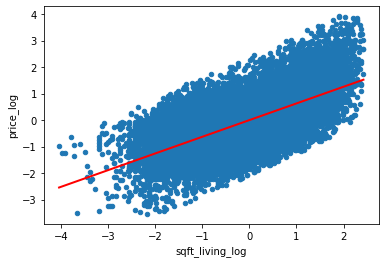

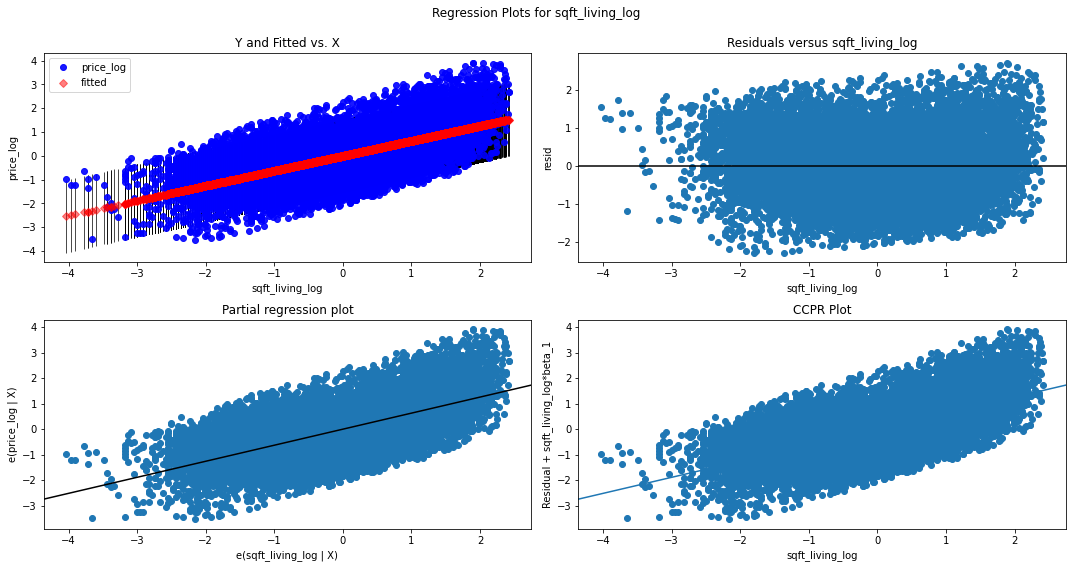

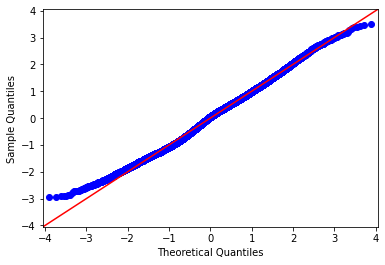

In [68]:
data=df2
f = 'price_log~sqft_living_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living_log': [data.sqft_living_log.min(), data.sqft_living_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living_log_norm_homo_it2", bbox_inches='tight')

plt.show()

R-Squared: 0.32215433086739786
Intercept           -4.232031e-14
sqft_living15_log    5.675864e-01
dtype: float64


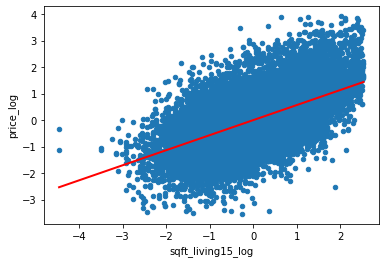

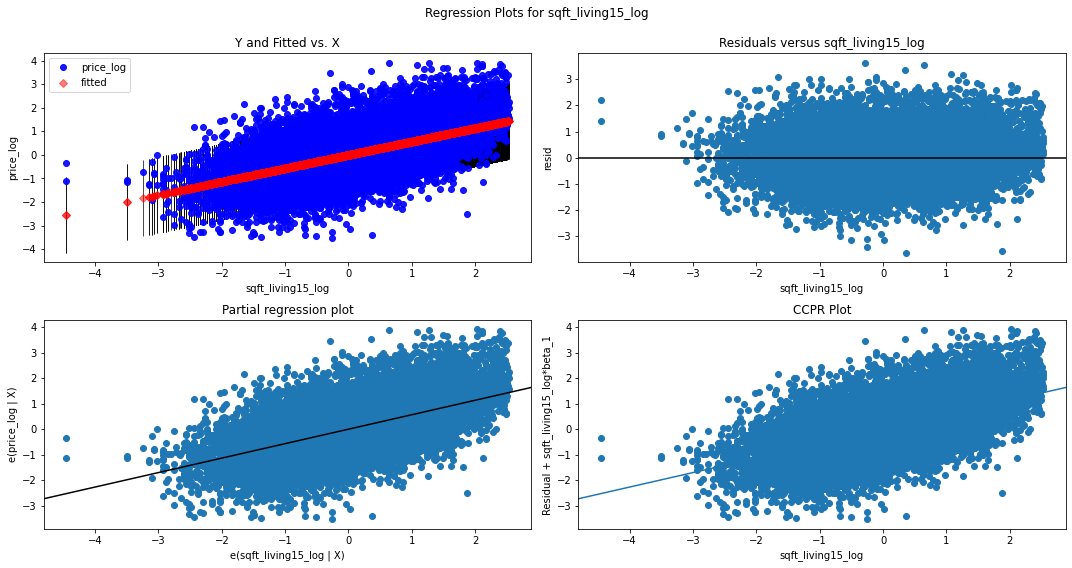

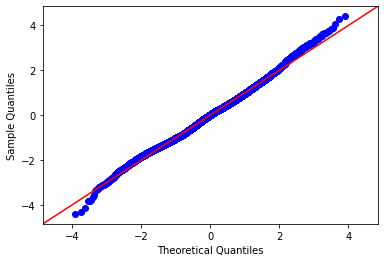

In [69]:
data=df2
f = 'price_log~sqft_living15_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living15_log': [data.sqft_living15_log.min(), data.sqft_living15_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living15_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living15_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living15_log_norm_homo_it2", bbox_inches='tight')

plt.show()

### Linear Assumptions Comments

The normal distributions for price, sqft_living and sqft_lving15 benefitted from being log transformed. They are no longer positively skewed and follow a typical bell shaped curve making it ideal for use in linear regression.

All continuous variables follow a linear trend validating the linear assumption. Performing a polynomial regression is not recommended as it could result in the model overfitting. 

Both sqft_living and sqft_lving15 no longer violate the normality and homoscedasticity assumptions however there are some observations to note:
* The sqft_living R-squared value went down. This could be the result of outliers still being present before log transformation. As seen in the Q-Q plot, the tails are curved at the ends suggesting outliers in the data
* The sqft_living15 went up after log transformation which is expected however, like the sqft_living variable, the Q-Q plot suggests outliers are still present in the data

## Iteration 3

For iteration 3, I will start by removing the outliers by reducing the data to within 2 standard deviations then observe if there has been an improvement in the R-squared value and error terms

Performing a polynomial regression may result in the model overfitting so in a final effort to increase the model's adjusted R-squared value, I will perform interactions. Iteration 3 is a good step to perform interactions because I have chosen the continuous and categorical variables that have a strong relationship with price.

I expect to see an increase in the adjusted R-squared compared to the iteration 2 model. Based on the observations of the linear assumptions, I will be able to perform model validation.

### Removing Outliers

Reducing the data from 3 standard deviations to 2 in order to further remove outliers

In [70]:
# Check this is the data cleaned dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          20538 non-null  float64 
 1   bedrooms       20538 non-null  category
 2   bathrooms      20538 non-null  category
 3   sqft_living    20538 non-null  int64   
 4   sqft_lot       20538 non-null  int64   
 5   floors         20538 non-null  category
 6   waterfront     20538 non-null  category
 7   view           20538 non-null  category
 8   condition      20538 non-null  int64   
 9   grade          20538 non-null  category
 10  sqft_above     20538 non-null  int64   
 11  sqft_basement  20538 non-null  float64 
 12  yr_built       20538 non-null  int64   
 13  yr_renovated   20538 non-null  float64 
 14  zipcode        20538 non-null  int64   
 15  lat            20538 non-null  float64 
 16  long           20538 non-null  float64 
 17  sqft_living15  20538 non-null  

In [71]:
# Reduce outliers by reducing data size to within 2 standard deviations

filter_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

df3 = df[~df[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 2 * x.std()).any(axis=1)]

In [72]:
# Check entries

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18737 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          18737 non-null  float64
 1   bedrooms       18737 non-null  int64  
 2   bathrooms      18737 non-null  float64
 3   sqft_living    18737 non-null  int64  
 4   sqft_lot       18737 non-null  int64  
 5   floors         18737 non-null  float64
 6   waterfront     18737 non-null  float64
 7   view           18737 non-null  float64
 8   condition      18737 non-null  int64  
 9   grade          18737 non-null  int64  
 10  sqft_above     18737 non-null  int64  
 11  sqft_basement  18737 non-null  float64
 12  yr_built       18737 non-null  int64  
 13  yr_renovated   18737 non-null  float64
 14  zipcode        18737 non-null  int64  
 15  lat            18737 non-null  float64
 16  long           18737 non-null  float64
 17  sqft_living15  18737 non-null  int64  
 18  sqft_l

In [73]:
continuous = ['sqft_living', 'sqft_living15', 'price']

# Log transform
df3_log = np.log(df3[continuous])
df3_log.columns = [f'{column}_log' for column in df3_log.columns]

# Normalize
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df3_log_norm = df3_log.apply(normalize)

categoricals = ['grade', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']

# Convert columns to category data type
for col in categoricals:
    df3[col] = df[col].astype('category')

# Perform one-hot encoding
df3_cat = pd.get_dummies(df3[categoricals], prefix=categoricals, drop_first=True)

df4 = pd.concat([df3_log_norm, df3_cat], axis=1)
df4.head()

<ipython-input-73-778b36fd29db>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-73-778b36fd29db>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-73-778b36fd29db>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

sqft_living_log  sqft_living15_log  price_log  grade_4  grade_5  grade_6  \
0        -1.067409          -0.977708  -1.412568        0        0        0   
1         1.050739          -0.169396   0.511368        0        0        0   
2        -2.229027           1.488281  -1.867183        0        0        1   
3         0.313403          -0.926104   0.762747        0        0        0   
4        -0.106070           0.050250   0.395258        0        0        0   

   grade_7  grade_8  grade_9  grade_10  ...  bedrooms_8  bedrooms_9  \
0        1        0        0         0  ...           0           0   
1        1        0        0         0  ...           0           0   
2        0        0        0         0  ...           0           0   
3        1        0        0         0  ...           0           0   
4        0        1        0         0  ...           0           0   

   bedrooms_10  bedrooms_11  floors_1.5  floors_2.0  floors_2.5  floors_3.0  \
0            0            0           0           0           0           0   
1            0            0           0           1           0           0   
2            0            0           0           0           0           0   
3            0            0           0           0           0           0   
4            0            0           0           0           0           0   

   floors_3.5  waterfront_1.0  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  

[5 rows x 61 columns]

In [74]:
# Checking model before performing interactions

X = df4.drop('price_log', axis=1)
y = df4['price_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     370.0
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:00:12   Log-Likelihood:                -20233.
No. Observations:               18737   AIC:                         4.057e+04
Df Residuals:                   18687   BIC:                         4.096e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6152      0.803     -0.766      0.444      -2.190       0.960
sqft_living_log       0.3058      0.011     28.154      0.000       0.284       0.327
sqft_living15_log     0.1230      0.008     15.585      0.000       0.108       0.139
grade_4              -0.9186      0.728     -1.261      0.207      -2.346       0.509
grade_5              -0.7181      0.721     -0.996      0.319      -2.131       0.695
grade_6              -0.3215      0.720     -0.446      0.655      -1.734       1.091
grade_7               0.0883      0.721      0.122      0.903      -1.324       1.501
grade_8               0.4747      0.721      0.659      0.510      -0.938       1.888
grade_9               0.9070      0.721      1.258      0.208      -0.506       2.320
grade_10              1.2800      0.722      1.773      0.076      -0.135       2.695
grade_11              1.6409      0.730      2.249      0.025       0.211       3.071
grade_12              2.9679      1.015      2.923      0.003       0.978       4.958
grade_13          -4.175e-14   2.74e-14     -1.524      0.127   -9.54e-14    1.19e-14
bathrooms_0.75        0.6920      0.368      1.879      0.060      -0.030       1.414
bathrooms_1.0         0.6456      0.357      1.807      0.071      -0.055       1.346
bathrooms_1.25        0.6268      0.429      1.460      0.144      -0.215       1.468
bathrooms_1.5         0.5759      0.358      1.610      0.107      -0.125       1.277
bathrooms_1.75        0.6538      0.358      1.828      0.068      -0.047       1.355
bathrooms_2.0         0.6553      0.358      1.832      0.067      -0.046       1.356
bathrooms_2.25        0.5843      0.358      1.633      0.102      -0.117       1.286
bathrooms_2.5         0.4627      0.358      1.294      0.196      -0.238       1.164
bathrooms_2.75        0.6385      0.358      1.782      0.075      -0.064       1.341
bathrooms_3.0         0.6818      0.359      1.900      0.057      -0.022       1.385
bathrooms_3.25        0.8167      0.360      2.269      0.023       0.111       1.522
bathrooms_3.5         0.8270      0.360      2.299      0.021       0.122       1.532
bathrooms_3.75        1.0711      0.369      2.899      0.004       0.347       1.795
bathrooms_4.0         0.8758      0.377      2.322      0.020       0.136       1.615
bathrooms_4.25        1.0736      0.424      2.534      0.011       0.243       1.904
bathrooms_4.5         0.6900      0.389      1.772      0.076      -0.073       1.453
bathrooms_4.75     9.309e-15   7.85e-15      1.185      0.236   -6.08e-15    2.47e-14
bathrooms_5.0         0.6747      0.514      1.312      0.189      -0.333       1.683
bathrooms_5.25       -0.1562      0.800     -0.195      0.845      -1.725       1.413
bathrooms_5.5      1.424e-15   1.24e-15      1.146      0.252   -1.01e-15

Interesting to note that reducing data to within 2 standard deviations instead of 3 standard drastically reduced the adjusted R-squared value. I will need to check the linearity assumptions to see how the data is distributed at 2 standard deviations.

### Distributions and KDE

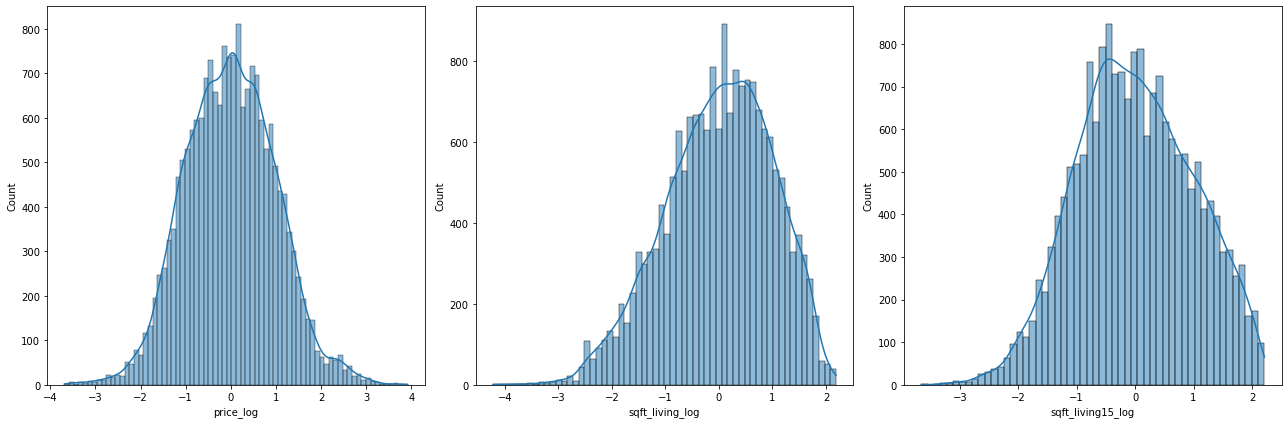

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(data=df4['price_log'], kde=True, ax=axs[0])
axs[0].set_xlabel('price_log')

sns.histplot(data=df4['sqft_living_log'], kde=True, ax=axs[1])
axs[1].set_xlabel('sqft_living_log')

sns.histplot(data=df4['sqft_living15_log'], kde=True, ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')

plt.tight_layout()

plt.savefig("images/dist_std2_it3", bbox_inches='tight')

plt.show()

### Verify the Linearity assumption

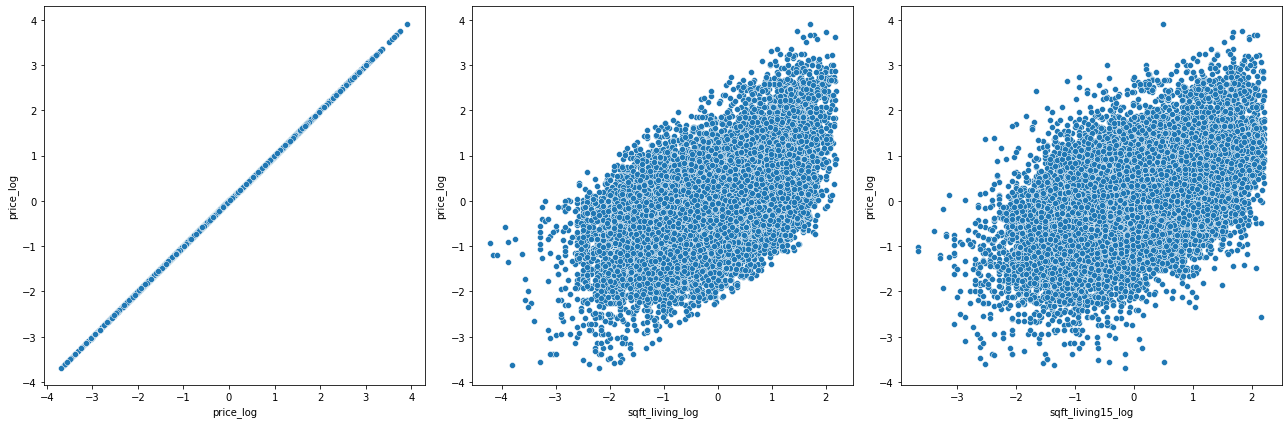

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=df4, x='price_log', y='price_log', ax=axs[0])
axs[0].set_xlabel('price_log')
axs[0].set_ylabel('price_log')

sns.scatterplot(data=df4, x='sqft_living_log', y='price_log', ax=axs[1])
axs[1].set_xlabel('sqft_living_log')
axs[1].set_ylabel('price_log')

sns.scatterplot(data=df4, x='sqft_living15_log', y='price_log', ax=axs[2])
axs[2].set_xlabel('sqft_living15_log')
axs[2].set_ylabel('price_log')

plt.tight_layout()

plt.savefig("images/scat_lin_std2_it3", bbox_inches='tight')

plt.show()

### Verify the Normality and Homoscedasticity assumptions

R-Squared: 0.32741545602699806
Intercept          1.368211e-13
sqft_living_log    5.722023e-01
dtype: float64


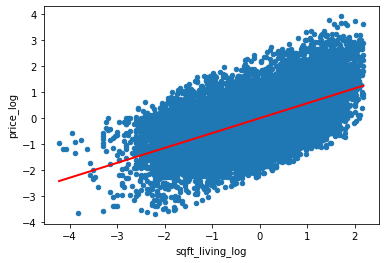

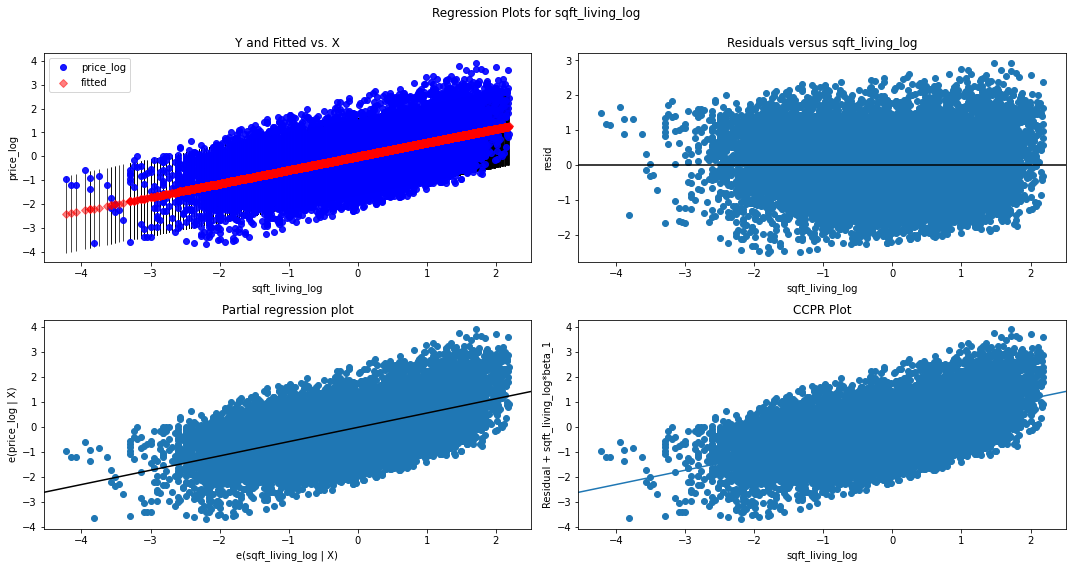

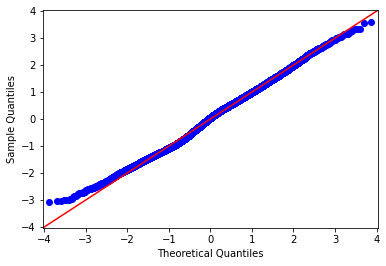

In [77]:
data=df4
f = 'price_log~sqft_living_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living_log': [data.sqft_living_log.min(), data.sqft_living_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living_std2_it3", bbox_inches='tight')

plt.show()

R-Squared: 0.25533512453976526
Intercept            1.035630e-13
sqft_living15_log    5.053070e-01
dtype: float64


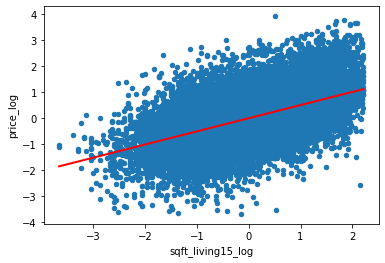

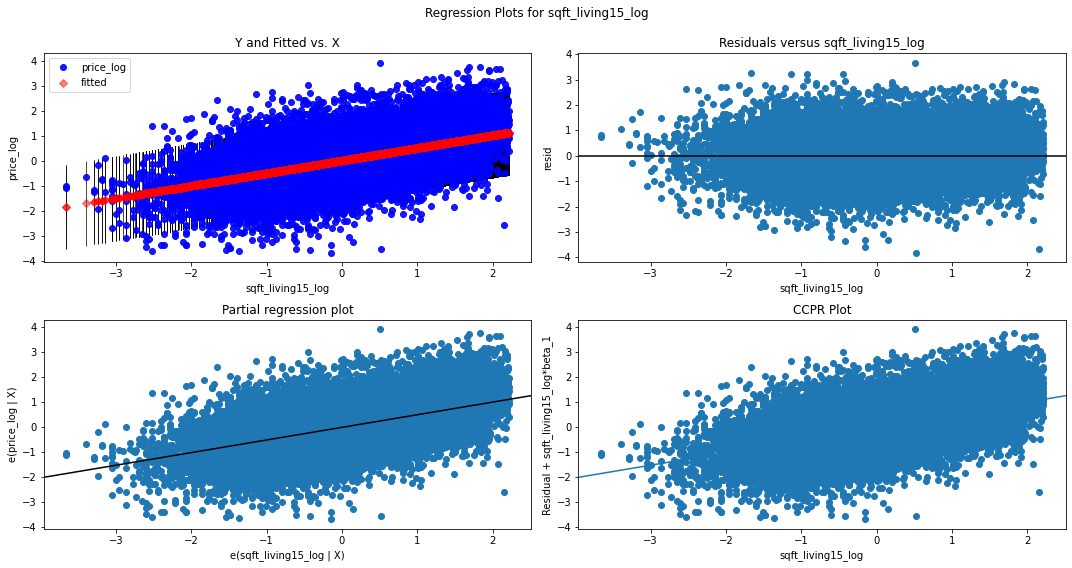

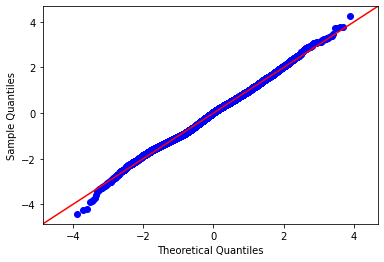

In [78]:
data=df4
f = 'price_log~sqft_living15_log'
model = smf.ols(formula=f, data=data).fit()
print ('R-Squared:',model.rsquared)
print (model.params)

X_new = pd.DataFrame({'sqft_living15_log': [data.sqft_living15_log.min(), data.sqft_living15_log.max()]})
preds = model.predict(X_new)

fig, ax = plt.subplots()
data.plot(kind='scatter', x='sqft_living15_log', y='price_log', ax=ax)
ax.plot(X_new['sqft_living15_log'], preds, c='red', linewidth=2)
plt.show()

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15_log", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

plt.savefig("images/price_log_sqft_living15_std2_it3", bbox_inches='tight')

plt.show()

### Iteration 3 comments within 2 standard deviations

Distributions remain normal however R-squared values have drastically reduced with data being limited to 2 standard deviations. Looking at the Q-Q plots, the top end values have resolved better however the scatter plot abruptly ends. The lower end is still experiencing negative skewness. It is evident that the outliers removed may not actually be outliers. While the 'outliers' sit far from the marjority of the data, the iteration 2 model suggests they still represent a strong correlation with price.

Going forward, I will keep the data at 3 standard deviations and perform interactions.

In [79]:
# Check this is the data cleaned dataframe

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          20538 non-null  float64 
 1   bedrooms       20538 non-null  category
 2   bathrooms      20538 non-null  category
 3   sqft_living    20538 non-null  int64   
 4   sqft_lot       20538 non-null  int64   
 5   floors         20538 non-null  category
 6   waterfront     20538 non-null  category
 7   view           20538 non-null  category
 8   condition      20538 non-null  int64   
 9   grade          20538 non-null  category
 10  sqft_above     20538 non-null  int64   
 11  sqft_basement  20538 non-null  float64 
 12  yr_built       20538 non-null  int64   
 13  yr_renovated   20538 non-null  float64 
 14  zipcode        20538 non-null  int64   
 15  lat            20538 non-null  float64 
 16  long           20538 non-null  float64 
 17  sqft_living15  20538 non-null  

In [80]:
# Repeating iteration 2 model as preparation for interactions and model validation

filter_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

df3 = df[~df[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 3 * x.std()).any(axis=1)]

continuous = ['sqft_living', 'sqft_living15','price']

# Log transform and normalize
df3_cont = df3[continuous]

# log features
log_names = [f'{column}_log' for column in df3_cont.columns]

df3_log = np.log(df3_cont)
df3_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df3_log_norm = df3_log.apply(normalize)

categoricals = ['grade', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']

# Convert columns to category data type
for col in categoricals:
    df3[col] = df[col].astype('category')

# Perform one-hot encoding
df3_cat = pd.get_dummies(df3[categoricals], prefix=categoricals, drop_first=True)

df4 = pd.concat([df3_log_norm, df3_cat], axis=1)

X = df4.drop('price_log', axis=1)
y = df4['price_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<ipython-input-80-b0892a63b17e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-80-b0892a63b17e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-80-b0892a63b17e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     497.5
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:00:18   Log-Likelihood:                -20756.
No. Observations:               20538   AIC:                         4.162e+04
Df Residuals:                   20485   BIC:                         4.204e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5864      0.750     -0.782      0.434      -2.055       0.883
sqft_living_log       0.3186      0.010     31.303      0.000       0.299       0.339
sqft_living15_log     0.1235      0.007     16.629      0.000       0.109       0.138
grade_4              -0.8597      0.680     -1.265      0.206      -2.192       0.472
grade_5              -0.6793      0.673     -1.010      0.313      -1.998       0.639
grade_6              -0.3152      0.672     -0.469      0.639      -1.633       1.002
grade_7               0.0643      0.672      0.096      0.924      -1.253       1.382
grade_8               0.4245      0.672      0.631      0.528      -0.894       1.742
grade_9               0.8410      0.673      1.250      0.211      -0.477       2.159
grade_10              1.1392      0.673      1.693      0.091      -0.180       2.458
grade_11              1.3925      0.675      2.064      0.039       0.070       2.715
grade_12              1.7482      0.705      2.478      0.013       0.365       3.131
grade_13           3.724e-14   2.37e-14      1.575      0.115   -9.11e-15    8.36e-14
bathrooms_0.75        0.6380      0.344      1.857      0.063      -0.035       1.311
bathrooms_1.0         0.6067      0.333      1.820      0.069      -0.047       1.260
bathrooms_1.25        0.5845      0.400      1.460      0.144      -0.200       1.369
bathrooms_1.5         0.5354      0.334      1.604      0.109      -0.119       1.190
bathrooms_1.75        0.6029      0.334      1.807      0.071      -0.051       1.257
bathrooms_2.0         0.6122      0.334      1.835      0.067      -0.042       1.266
bathrooms_2.25        0.5535      0.334      1.658      0.097      -0.101       1.208
bathrooms_2.5         0.4270      0.334      1.280      0.201      -0.227       1.081
bathrooms_2.75        0.5845      0.334      1.749      0.080      -0.071       1.239
bathrooms_3.0         0.6358      0.335      1.900      0.057      -0.020       1.292
bathrooms_3.25        0.7655      0.335      2.284      0.022       0.109       1.422
bathrooms_3.5         0.7079      0.335      2.113      0.035       0.051       1.364
bathrooms_3.75        0.9664      0.340      2.846      0.004       0.301       1.632
bathrooms_4.0         0.8357      0.343      2.434      0.015       0.163       1.509
bathrooms_4.25        1.0294      0.353      2.919      0.004       0.338       1.721
bathrooms_4.5         0.7179      0.347      2.071      0.038       0.038       1.397
bathrooms_4.75        1.5234      0.472      3.226      0.001       0.598       2.449
bathrooms_5.0         0.7598      0.410      1.852      0.064      -0.044       1.564
bathrooms_5.25        1.1696      0.472      2.476      0.013       0.244       2.096
bathrooms_5.5     -6.164e-15   4.89e-15     -1.259      0.208   -1.58e-14

### Performing Interactions



In [81]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))

baseline

0.5550918109488123

In [82]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data["interaction"] = data[a] * data[b]
    score = np.mean(
        cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation)
    )
    if score > baseline:
        interactions.append((a, b, round(score, 3)))

    if i % 50 == 0:
        print(i)

print(
    "Top 3 interactions: %s"
    % sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3]
)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
Top 3 interactions: [('sqft_living_log', 'grade_4', 0.555), ('sqft_living_log', 'bedrooms_2', 0.555), ('sqft_living_log', 'waterfront_1.0', 0.555)]


sqft_living_log has a relationship with 3 separate independent variables. This suggests that where other independent variables perform well, so will sqft_living. Therefore sqft_living is an essential variable to this model

Reviewing the iteration 2 model, grade_4 and bedrooms_2 are statistically insignificant. The interaction of sqft_living_log and waterfront_1.0 will be used. In terms of real world application, this interactions suggests houses with waterfront tend to be larger in square feet and price.

In [83]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final["sqft_living_log*waterfront_1.0"] = (
    final["sqft_living_log"] * final["waterfront_1.0"]
)

final_model = np.mean(
    cross_val_score(regression, final, y, scoring="r2", cv=crossvalidation)
)

print("Baseline Model:" )
print(baseline)
print("Baseline Model plus interaction:" )
print(final_model)

Baseline Model:
0.5550918109488123
Baseline Model plus interaction:
0.5551086194902063


In [84]:
# Adding interaction to model

df_inter_sm = sm.add_constant(final)
model = sm.OLS(y, final)
results = model.fit()

results.summary()

C:\Users\jules\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              488.3
Date:                Tue, 04 Jul 2023   Prob (F-statistic):                        0.00
Time:                        07:09:11   Log-Likelihood:                         -20754.
No. Observations:               20538   AIC:                                  4.161e+04
Df Residuals:                   20485   BIC:                                  4.203e+04
Df Model:                          53                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sqft_living_log                    0.3182      0.010     31.274      0.000       0.298       0.338
sqft_living15_log                  0.1237      0.007     16.650      0.000       0.109       0.138
grade_4                           -1.3337      0.327     -4.083      0.000      -1.974      -0.693
grade_5                           -1.1420      0.302     -3.776      0.000      -1.735      -0.549
grade_6                           -0.7809      0.301     -2.592      0.010      -1.371      -0.190
grade_7                           -0.4020      0.301     -1.334      0.182      -0.993       0.189
grade_8                           -0.0420      0.301     -0.139      0.889      -0.633       0.549
grade_9                            0.3744      0.302      1.241      0.215      -0.217       0.966
grade_10                           0.6716      0.302      2.221      0.026       0.079       1.264
grade_11                           0.9214      0.306      3.015      0.003       0.322       1.520
grade_12                           1.2529      0.369      3.399      0.001       0.530       1.975
grade_13                       -1.081e-14   3.16e-15     -3.419      0.001    -1.7e-14   -4.61e-15
bathrooms_0.75                     0.5323      0.306      1.742      0.081      -0.067       1.131
bathrooms_1.0                      0.4884      0.299      1.635      0.102      -0.097       1.074
bathrooms_1.25                     0.4745      0.372      1.275      0.202      -0.255       1.204
bathrooms_1.5                      0.4173      0.299      1.394      0.163      -0.169       1.004
bathrooms_1.75                     0.4850      0.299      1.622      0.105      -0.101       1.071
bathrooms_2.0                      0.4941      0.299      1.652      0.099      -0.092       1.080
bathrooms_2.25                     0.4354      0.299      1.455      0.146      -0.151       1.022
bathrooms_2.5                      0.3089      0.299      1.033      0.302      -0.277       0.895
bathrooms_2.75                     0.4659      0.300      1.555      0.120      -0.121       1.053
bathrooms_3.0                      0.5173      0.300      1.724      0.085      -0.071       1.105
bathrooms_3.25                     0.6469      0.301      2.152      0.031       0.058       1.236
bathrooms_3.5                      0.5901      0.300      1.964      0.049       0.001       1.179
bathrooms_3.75                     0.8489      0.306      2.778      0.005       0.250       1.448
bathrooms_4.0                      0.7101      0.310      2.292      0.022       0.103       1.317
bathrooms_4.25                     0.9123      0.320      2.851      0.004       0.285       1.539
bathrooms_4.5 

Adding the interaction did not increase the adjusted R-squared value. Since the model did not improve, it is most likely at its best fit and is ready for model validation.

### Model Validation

In [85]:
df4.head()

sqft_living_log  sqft_living15_log  price_log  grade_4  grade_5  grade_6  \
0        -1.121522          -1.019966  -1.424053        0        0        0   
1         0.835051          -0.273574   0.368409        0        0        0   
2        -2.194530           1.257118  -1.847602        0        0        1   
3         0.153960          -0.972315   0.602610        0        0        0   
4        -0.233515          -0.070754   0.260234        0        0        0   

   grade_7  grade_8  grade_9  grade_10  ...  bedrooms_8  bedrooms_9  \
0        1        0        0         0  ...           0           0   
1        1        0        0         0  ...           0           0   
2        0        0        0         0  ...           0           0   
3        1        0        0         0  ...           0           0   
4        0        1        0         0  ...           0           0   

   bedrooms_10  bedrooms_11  floors_1.5  floors_2.0  floors_2.5  floors_3.0  \
0            0            0           0           0           0           0   
1            0            0           0           1           0           0   
2            0            0           0           0           0           0   
3            0            0           0           0           0           0   
4            0            0           0           0           0           0   

   floors_3.5  waterfront_1.0  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  

[5 rows x 61 columns]

In [86]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 0 to 21596
Data columns (total 61 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sqft_living_log    20538 non-null  float64
 1   sqft_living15_log  20538 non-null  float64
 2   price_log          20538 non-null  float64
 3   grade_4            20538 non-null  uint8  
 4   grade_5            20538 non-null  uint8  
 5   grade_6            20538 non-null  uint8  
 6   grade_7            20538 non-null  uint8  
 7   grade_8            20538 non-null  uint8  
 8   grade_9            20538 non-null  uint8  
 9   grade_10           20538 non-null  uint8  
 10  grade_11           20538 non-null  uint8  
 11  grade_12           20538 non-null  uint8  
 12  grade_13           20538 non-null  uint8  
 13  bathrooms_0.75     20538 non-null  uint8  
 14  bathrooms_1.0      20538 non-null  uint8  
 15  bathrooms_1.25     20538 non-null  uint8  
 16  bathrooms_1.5      205

In [87]:
from sklearn.model_selection import train_test_split

X = df4.drop('price_log', axis=1)
y = df4['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [88]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [89]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.4426173699654987
Test Mean Squared Error:  1.7332208309125228e+20


### Model Validation Comments

A huge case of overfitting. While the trainMSE is relatively low, the testMSE is through the roof indicating there is still a lot of variance in the data set being used.

## Iteration 4

Another iteration is required because the model is dramatically overfitting. It cannot be trusted that the data set is a true representation of the relationship between the independent variables and the target variable, price. 

Based on iteration 3 I will drop these indepdendent variables as they are statistically insignificant

grade_4, grade_5, grade_6, grade_7, grade_8, grade_9, grade_10

bathrooms_0.75, bathrooms_1.0, bathrooms_1.25, bathrooms_1.5, bathrooms_1.75, bathrooms_2.0, bathrooms_2.25, bathrooms_2.5, bathrooms_2.75, bathrooms_3.0, bathrooms_5.0, bathrooms_5.75, bathrooms_7.5, bathrooms_6.0

bedrooms_8, bedrooms_9, bedrooms_10, bedrooms_11

floors_3.5

As an early observation only the highest of grades have a relationship with price.

The house requires more than 3 bathrooms before it starts having an effect on price.

The effect of bedrooms on price peaks at 8.

More than 3 floors has no relevance however that contradicts with sqft_living having a strong correlation with price. The data points for houses with more than 3.5 must be outliers. That would be believable in a real world application because it is rare to see houses with more than 3 floors.

Also it was observed in iteration 3 that when the data was reduced to within two standard deviations that the R-squared was reduced. Initially this was seen as negative but as we can see in the model validation, there is a lot of variance still in the data. For iteration 4, I will reduce the data to within two standard deviations. 

Luckily, most of these are categorical variables. Since the linear assumptions have been proven in iteration 3, they will not needed to be checked and I can focus on the model and model validation.

In [91]:
filter_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

df3 = df[~df[filter_cols].apply(lambda x: np.abs(x - x.mean()) > 2 * x.std()).any(axis=1)]

continuous = ['sqft_living', 'sqft_living15','price']

# Log transform and normalize
df3_cont = df3[continuous]

# log features
log_names = [f'{column}_log' for column in df3_cont.columns]

df3_log = np.log(df3_cont)
df3_log.columns = log_names

# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df3_log_norm = df3_log.apply(normalize)

categoricals = ['grade', 'bathrooms', 'view', 'bedrooms', 'floors', 'waterfront']

# Convert columns to category data type
for col in categoricals:
    df3[col] = df[col].astype('category')

# Perform one-hot encoding
df3_cat = pd.get_dummies(df3[categoricals], prefix=categoricals, drop_first=True)

df4 = pd.concat([df3_log_norm, df3_cat], axis=1)

# Drop indepdendent variables
drop_grade = ['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8','grade_9','grade_10']
drop_bathrooms = ['bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_5.0', 'bathrooms_5.75', 'bathrooms_7.5', 'bathrooms_6.0']
drop_bedrooms = ['bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11']
drop_floors = ['floors_3.5']

X = df4.drop(['price_log'] + drop_grade + drop_bathrooms + drop_bedrooms + drop_floors, axis=1)
y = df4['price_log']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<ipython-input-91-2fef91563a97>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-91-2fef91563a97>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = df[col].astype('category')
<ipython-input-91-2fef91563a97>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     534.3
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        07:09:11   Log-Likelihood:                -21383.
No. Observations:               18737   AIC:                         4.282e+04
Df Residuals:                   18710   BIC:                         4.303e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1691      0.056      2.996      0.003       0.058       0.280
sqft_living_log       0.4684      0.010     47.742      0.000       0.449       0.488
sqft_living15_log     0.2131      0.008     26.717      0.000       0.197       0.229
grade_11              0.8378      0.119      7.020      0.000       0.604       1.072
grade_12              1.9588      0.759      2.579      0.010       0.470       3.447
grade_13           3.395e-15   1.91e-15      1.777      0.076    -3.5e-16    7.14e-15
bathrooms_3.25        0.4158      0.044      9.462      0.000       0.330       0.502
bathrooms_3.5         0.4080      0.040     10.138      0.000       0.329       0.487
bathrooms_3.75        0.6839      0.098      6.965      0.000       0.491       0.876
bathrooms_4.0         0.3899      0.128      3.057      0.002       0.140       0.640
bathrooms_4.25        0.6397      0.241      2.653      0.008       0.167       1.112
bathrooms_4.5         0.2460      0.162      1.521      0.128      -0.071       0.563
bathrooms_4.75    -1.666e-14    6.3e-15     -2.645      0.008    -2.9e-14   -4.31e-15
bathrooms_5.25       -0.9247      0.761     -1.215      0.224      -2.416       0.567
bathrooms_5.5      9.599e-15   5.35e-15      1.793      0.073   -8.95e-16    2.01e-14
bathrooms_6.25    -6.974e-15   3.48e-15     -2.007      0.045   -1.38e-14   -1.62e-16
bathrooms_6.5      2.131e-14   1.03e-14      2.070      0.038    1.13e-15    4.15e-14
bathrooms_6.75     2.634e-16   4.88e-16      0.540      0.589   -6.93e-16    1.22e-15
bathrooms_7.75     1.389e-15   5.25e-16      2.644      0.008    3.59e-16    2.42e-15
bathrooms_8.0     -6.013e-16   1.55e-16     -3.882      0.000   -9.05e-16   -2.98e-16
view_1.0              0.4386      0.049      8.914      0.000       0.342       0.535
view_2.0              0.4082      0.030     13.433      0.000       0.349       0.468
view_3.0              0.4813      0.047     10.246      0.000       0.389       0.573
view_4.0              0.8281      0.075     11.024      0.000       0.681       0.975
bedrooms_2            0.0473      0.056      0.842      0.400      -0.063       0.157
bedrooms_3           -0.3191      0.056     -5.683      0.000      -0.429      -0.209
bedrooms_4           -0.3968      0.058     -6.826      0.000      -0.511      -0.283
bedrooms_5           -0.4365      0.063     -6.941      0.000      -0.560      -0.313
bedrooms_6           -0.4694      0.087     -5.424      0.000      -0.639      -0.300
bedrooms_7           -0.5075      0.183     -2.773      0.006      -0.866      -0.149
floors_1.5            0.4275      0.020     21.290      0.000       0.388       0.467
floors_2.0            0.0202      0.014      1.460      0.144      -0.007       0.047
floors_2.5            0.6067      0.075      8.136      0.000       0.461

In [92]:
# See highest to lowest co-efficients

# Get the summary table as HTML
summary_html = model.summary().tables[1].as_html()

# Convert the HTML table to a DataFrame
coef_df = pd.read_html(summary_html, header=0, index_col=0)[0]

# Convert coefficient values to numeric type
coef_df['coef'] = pd.to_numeric(coef_df['coef'], errors='coerce')

# Sort the coefficients by value in descending order
coef_df_sorted = coef_df.sort_values('coef', ascending=False)

# Print the sorted coefficient table
print(coef_df_sorted)

                           coef       std err       t  P>|t|        [0.025  \
grade_12           1.958800e+00  7.590000e-01   2.579  0.010  4.700000e-01   
grade_11           8.378000e-01  1.190000e-01   7.020  0.000  6.040000e-01   
view_4.0           8.281000e-01  7.500000e-02  11.024  0.000  6.810000e-01   
bathrooms_3.75     6.839000e-01  9.800000e-02   6.965  0.000  4.910000e-01   
bathrooms_4.25     6.397000e-01  2.410000e-01   2.653  0.008  1.670000e-01   
floors_2.5         6.067000e-01  7.500000e-02   8.136  0.000  4.610000e-01   
floors_3.0         5.829000e-01  3.300000e-02  17.700  0.000  5.180000e-01   
view_3.0           4.813000e-01  4.700000e-02  10.246  0.000  3.890000e-01   
sqft_living_log    4.684000e-01  1.000000e-02  47.742  0.000  4.490000e-01   
waterfront_1.0     4.527000e-01  1.110000e-01   4.076  0.000  2.350000e-01   
view_1.0           4.386000e-01  4.900000e-02   8.914  0.000  3.420000e-01   
floors_1.5         4.275000e-01  2.000000e-02  21.290  0.000  3.

### Iteration 4 Comments

Again the adjusted R-squared value has lowered as more outliers are removed, therefore reducing the variance.

### Model Validation

In [93]:
from sklearn.model_selection import train_test_split

drop_grade = ['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8','grade_9','grade_10']
drop_bathrooms = ['bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_5.0', 'bathrooms_5.75', 'bathrooms_7.5', 'bathrooms_6.0']
drop_bedrooms = ['bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11']
drop_floors = ['floors_3.5']

X = df4.drop(['price_log'] + drop_grade + drop_bathrooms + drop_bedrooms + drop_floors, axis=1)
y = df4['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 0.5702729561689224
Test Mean Squared Error:  0.5853459305234379


Slightly higher errors in trainMSE however the testMSE has greatly reduced leading to a model that fits much better. It is clear the effect of removing more variance by reducing the data set within 2 standard deviations and removing statistically insignificant variables. 

In [94]:
# Using K-Fold Cross Validation to verify

drop_grade = ['grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8','grade_9','grade_10']
drop_bathrooms = ['bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_5.0', 'bathrooms_5.75', 'bathrooms_7.5', 'bathrooms_6.0']
drop_bedrooms = ['bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11']
drop_floors = ['floors_3.5']

X = df4.drop(['price_log'] + drop_grade + drop_bathrooms + drop_bedrooms + drop_floors, axis=1)
y = df4['price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

scoring = {'mse': 'neg_mean_squared_error'}
results = cross_validate(linreg, X, y, scoring=scoring, cv=10)

test_mse_scores = -results['test_mse']

train_predictions = linreg.predict(X)
train_mse = mean_squared_error(y, train_predictions)

print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse_scores.mean())

Train Mean Squared Error: 0.5740418030948392
Test Mean Squared Error: 0.5772426558303619


In [95]:
# Get top 5 variables

from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False])

In [96]:
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['grade_11', 'grade_12', 'bathrooms_3.75', 'view_3.0', 'view_4.0'], dtype='object')


## Evaluation

After 4 iterations, a collection of the top independent variables were used to create the final model. Using sklearn's feature selector the top 5 variables that have a strong relationship with the target variable price are:

* grade_11
* grade_12
* bathrooms_3.75
* view_3.0
* view_4.0

I believe this linear regression model successfully solves the business problem of identifying the five factors that have a strong relationship with price. Initially I expected the adjusted R-squared of the model to increase as more statistically significant variables were identified. However, reducing variance and outliers proved to be the more important factor which result in a lower adjusted R-squared value. 

Reducing the data set to within 2 standard variations initially looked extreme as the adjusted R-squared dipped to almost half of the baseline model. However when the first model validation was performed, it showed that the model was dramatically overfitting indicating a lot of variance was still present in the data set. 

During each iteration, the P-values held true with the correlation heat map. This provides me with great confidence that the correct variables were being chosen to be used in the model. It is important for data to also make sense in a real world application. Looking at the top 5 variables, they are realistic in the sense that a typical person would expect those variables when evaluating the price of a house.

## Conclusion

King County has a ranking system that represents the construction quality of improvements. They are generally defined as:

**1-3** Falls short of minimum building standards. Normally cabin or inferior structure.

**4** Generally older, low quality construction. Does not meet code.

**5** Low construction costs and workmanship. Small, simple design.

**6** Lowest grade currently meeting building code. Low quality materials and simple designs.

**7** Average grade of construction and design. Commonly seen in plats and older sub-divisions.

**8** Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

**9** Better architectural design with extra interior and exterior design and quality.

**10** Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

**11** Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

**12** Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

**13** Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

The results Grade 11 and 12 sit on the higher end of the ranking system and is reflective of the model that has been produced. Investing in an excellent builder, high quality materials and luxurious options will yield a higher house price.

Based on the statistical significance of the number of bathrooms throughout the iterations, it was observed that the number of bathrooms only started having a strong relationship with price at 3. Again this is reflective in the results at 3.75. The results suggest that many of the higher priced homes have a minimum 3 bathrooms.

The features of the home are not the only important factors in raising the price of a house. The location is just as important and in this case, if the house has a view. King County has a variety of landmarks, ocean, lake and views. Opting to build a house within view of these natural and manmade points of interest and it will have a positive effect on the price.

In conclusion, in order for the east coast residential builder to be successful on the east coast, specifically King County, they must consider:

* Creating a custom design using high quality materials, high quality finish work and luxurious options
* Incorporating 3 or more bathrooms into their designs
* Choosing a location of the house with a great view of local points of interest